In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
inp0 = pd.read_csv("C:\\Users\\medin\\Downloads\\Assignment\\application_data.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [26]:
inp0.shape


(307511, 122)

In [58]:
#check datatypes of each field in dataframe
inp0.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [59]:
#checking for percentage of missing values in each column
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [60]:
#checking for coloums having greater than 50% null value

emptycol=inp0.isnull().sum()/len(inp0)*100
emptycol=emptycol[emptycol.values>50.0]
print(emptycol)
len(emptycol)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

41

In [61]:
#Removing all columns having more than 50% null values
emptycol = list(emptycol[emptycol.values>=50.0].index)
inp0.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

41


In [62]:
#checking shape of the dataframe after removing columns
inp0.shape

(307511, 81)

In [63]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [64]:
#checking for coloums having less than 19% null value
emptycol=inp0.isnull().sum()/len(inp0)*100
emptycol=emptycol[emptycol.values<19.0]
print(emptycol)
len(emptycol)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 71, dtype: float64


71

1. Analysis of AMT_ANNUITY column

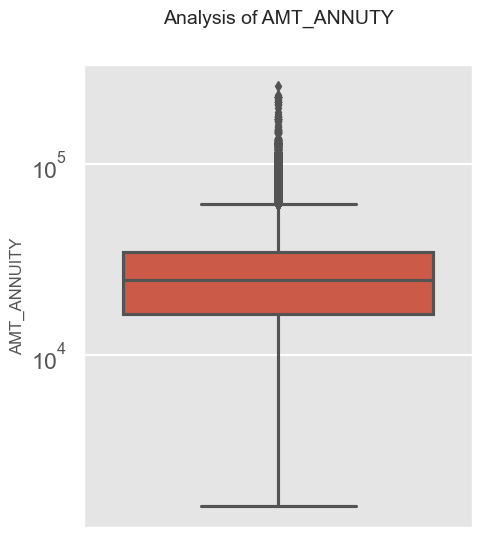

In [65]:

#plotting the values of AMT_ANNUITY column using box plot to detect outliers
plt.figure(figsize=(5,6))
sns.boxplot(y=inp0['AMT_ANNUITY'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_ANNUTY",fontsize=14)
plt.show()

In [66]:
#describe the info of column AMT_ANNUITY
print(inp0['AMT_ANNUITY'].mean())
print(inp0['AMT_ANNUITY'].median())
print(inp0['AMT_ANNUITY'].describe())

27108.573909183444
24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


Inference:
From the Box Plot we can see that there are sever outliners and the difference between max and min is quite severe. So we are taking median value to replace those null values.

In [67]:
#Verifying the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

12

In [68]:
# Filling missing values in column AMT_ANNUITY with median
fillMissingVal=inp0['AMT_ANNUITY'].median()
inp0['AMT_ANNUITY'].fillna(value = fillMissingVal, inplace =True)

In [69]:
#checking the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

0

In [70]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

2. Analysis of CNT_FAM_MEMBERS

In [71]:
#checking count of family members
inp0['CNT_FAM_MEMBERS'].value_counts(dropna=False)

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

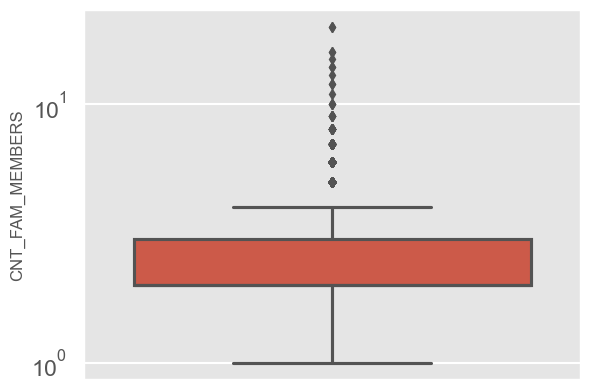

In [72]:
#plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers
sns.boxplot(y=inp0['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()

In [73]:
#describe the info of column CNT_FAM_MEMBERS
print(inp0['CNT_FAM_MEMBERS'].mean())
print(inp0['CNT_FAM_MEMBERS'].median())
print(inp0['CNT_FAM_MEMBERS'].describe())

2.152665450442101
2.0
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [74]:
# Filling missing values with median
fillMissingVal=inp0['CNT_FAM_MEMBERS'].median()
inp0['CNT_FAM_MEMBERS'].fillna(value = fillMissingVal, inplace =True)

In [75]:
#checking the count of missing value for CNT_FAM_MEMBERS column
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

In [76]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

Inference:
From the BoxPlot we can see that there are severe outliners and their is quite a difference between 75% and max.So we are taking median value to replace those null values.

3. Analysis of Code gender

In [77]:
#checking count of each gender M/F
inp0['CODE_GENDER'].value_counts(dropna=False)

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Inference:
As We can see that Female(F) is having the majority and only 4 rows are having XNA values. So, there wont be any major impact in the dataset if we can update those columns with Gender 'F'.

In [78]:
#replace XNA with F and #checking count of each gender M/F
inp0.loc[inp0['CODE_GENDER']=='XNA','CODE_GENDER']='F'
inp0['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

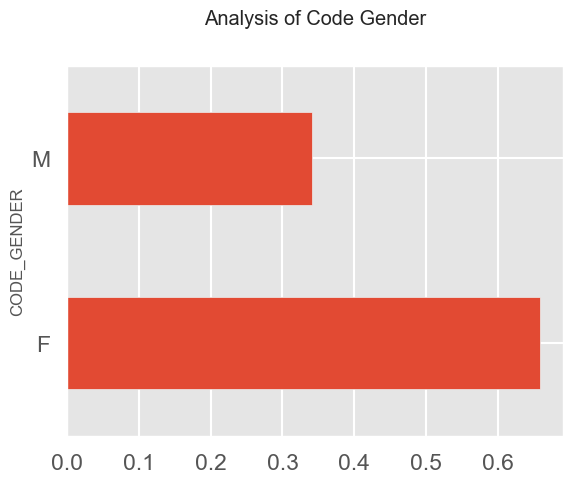

In [79]:
#plot the bar graph of CODE_GENDER
inp0['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of Code Gender')
plt.show()

4. Analysis of ORGANIZATION_TYPE

In [80]:
#checking count of each Type of organization where client works
inp0['ORGANIZATION_TYPE'].value_counts(dropna=False)

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [81]:
#describe the info of column ORGANIZATION_TYPE
print(inp0['ORGANIZATION_TYPE'].mode())
print(inp0['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object
count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


Inference:
There are 55374 rows wit XNA value which is 18% of the total count. So we can discard them.

5. Analysis of AMT_GOODS_PRICE

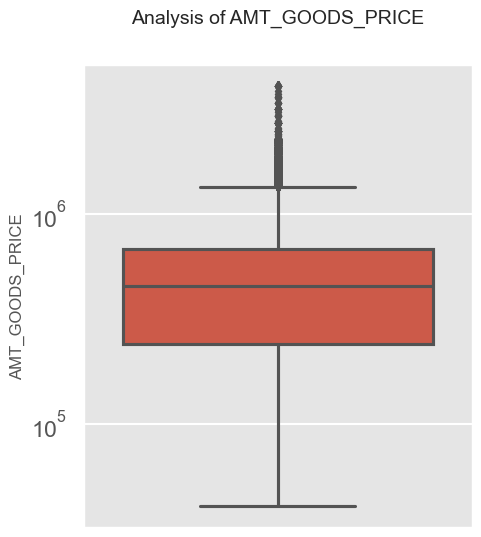

In [83]:
#box plotting the values of AMT_GOODS_PRICE
plt.figure(figsize=(5,6))
sns.boxplot(y=inp0['AMT_GOODS_PRICE'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_GOODS_PRICE",fontsize=14)
plt.show()

In [84]:
#describe the info of column AMT_GOODS_PRICE
print(inp0['AMT_GOODS_PRICE'].describe())
print(inp0['AMT_GOODS_PRICE'].median())
print(inp0['AMT_GOODS_PRICE'].mean())
print(inp0['AMT_GOODS_PRICE'].max())
print(inp0['AMT_GOODS_PRICE'].min())

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895
4050000.0
40500.0


**Inference:**
As we can see we are not getting any clear understanding of the data, so we would keep the null values.

**6. Analysis of AMT_REQ_CREDIT_BUREAU_DAY**

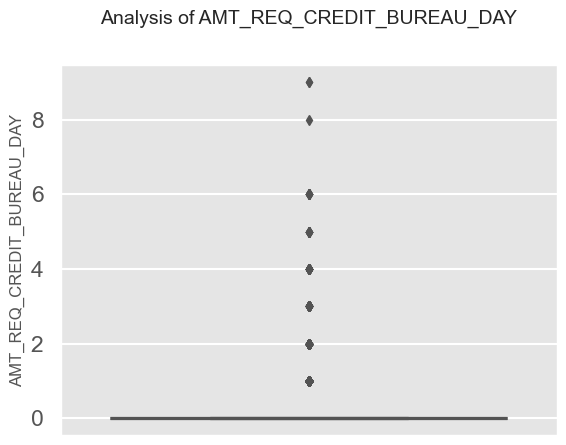

In [85]:
#box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=inp0['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.title("Analysis of AMT_REQ_CREDIT_BUREAU_DAY",fontsize=14)
plt.show()

In [86]:
#describe the info of column AMT_REQ_CREDIT_BUREAU_DAY
print(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


**Inference**
As we can see the numerical column AMT_REQ_CREDIT_BUREAU_DAY has outliers so they need to be removed or capped.Also for missing value fillup we need to use the median in this case.

**Handling outlier**

C:\Users\medin\AppData\Local\Temp\ipykernel_7760\3514592476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0[col][inp0[col] <= percentiles[0]] = percentiles[0]
C:\Users\medin\AppData\Local\Temp\ipykernel_7760\3514592476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0[col][inp0[col] >= percentiles[1]] = percentiles[1]


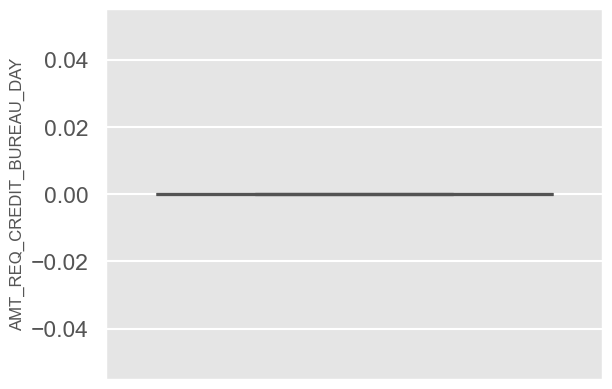

In [88]:
#Removing outliers for the column AMT_REQ_CREDIT_BUREAU_DAY
col_of_outliers=['AMT_REQ_CREDIT_BUREAU_DAY']
for col in col_of_outliers:
    percentiles = inp0[col].quantile([0.01,0.99]).values
    inp0[col][inp0[col] <= percentiles[0]] = percentiles[0]
    inp0[col][inp0[col] >= percentiles[1]] = percentiles[1]
    #box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=inp0['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

Changing the datatype for the required columns

In [89]:
inp0.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [90]:
# Casting all variable into numeric in the dataset
numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

inp0[numeric_cols]=inp0[numeric_cols].apply(pd.to_numeric)
inp0.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Binning

In [91]:
# Creating bins for income amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

inp0['AMT_INCOME_RANGE']=pd.cut(inp0['AMT_INCOME_TOTAL'],bins,labels=slot)

In [92]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

inp0['AMT_CREDIT_RANGE']=pd.cut(inp0['AMT_CREDIT'],bins=bins,labels=slots)

In [93]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = inp0.loc[inp0["TARGET"]==0]
target1 = inp0.loc[inp0["TARGET"]==1]

In [94]:
# Calculating Imbalance percentage
imbalance=round(len(target0)/len(target1),2)
imbalance

11.39

**Univariate analysis for categories**

In [95]:
#reusable ploting function

def plotfunc(df,col,title,hue = None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title,fontsize=14)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='bright') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


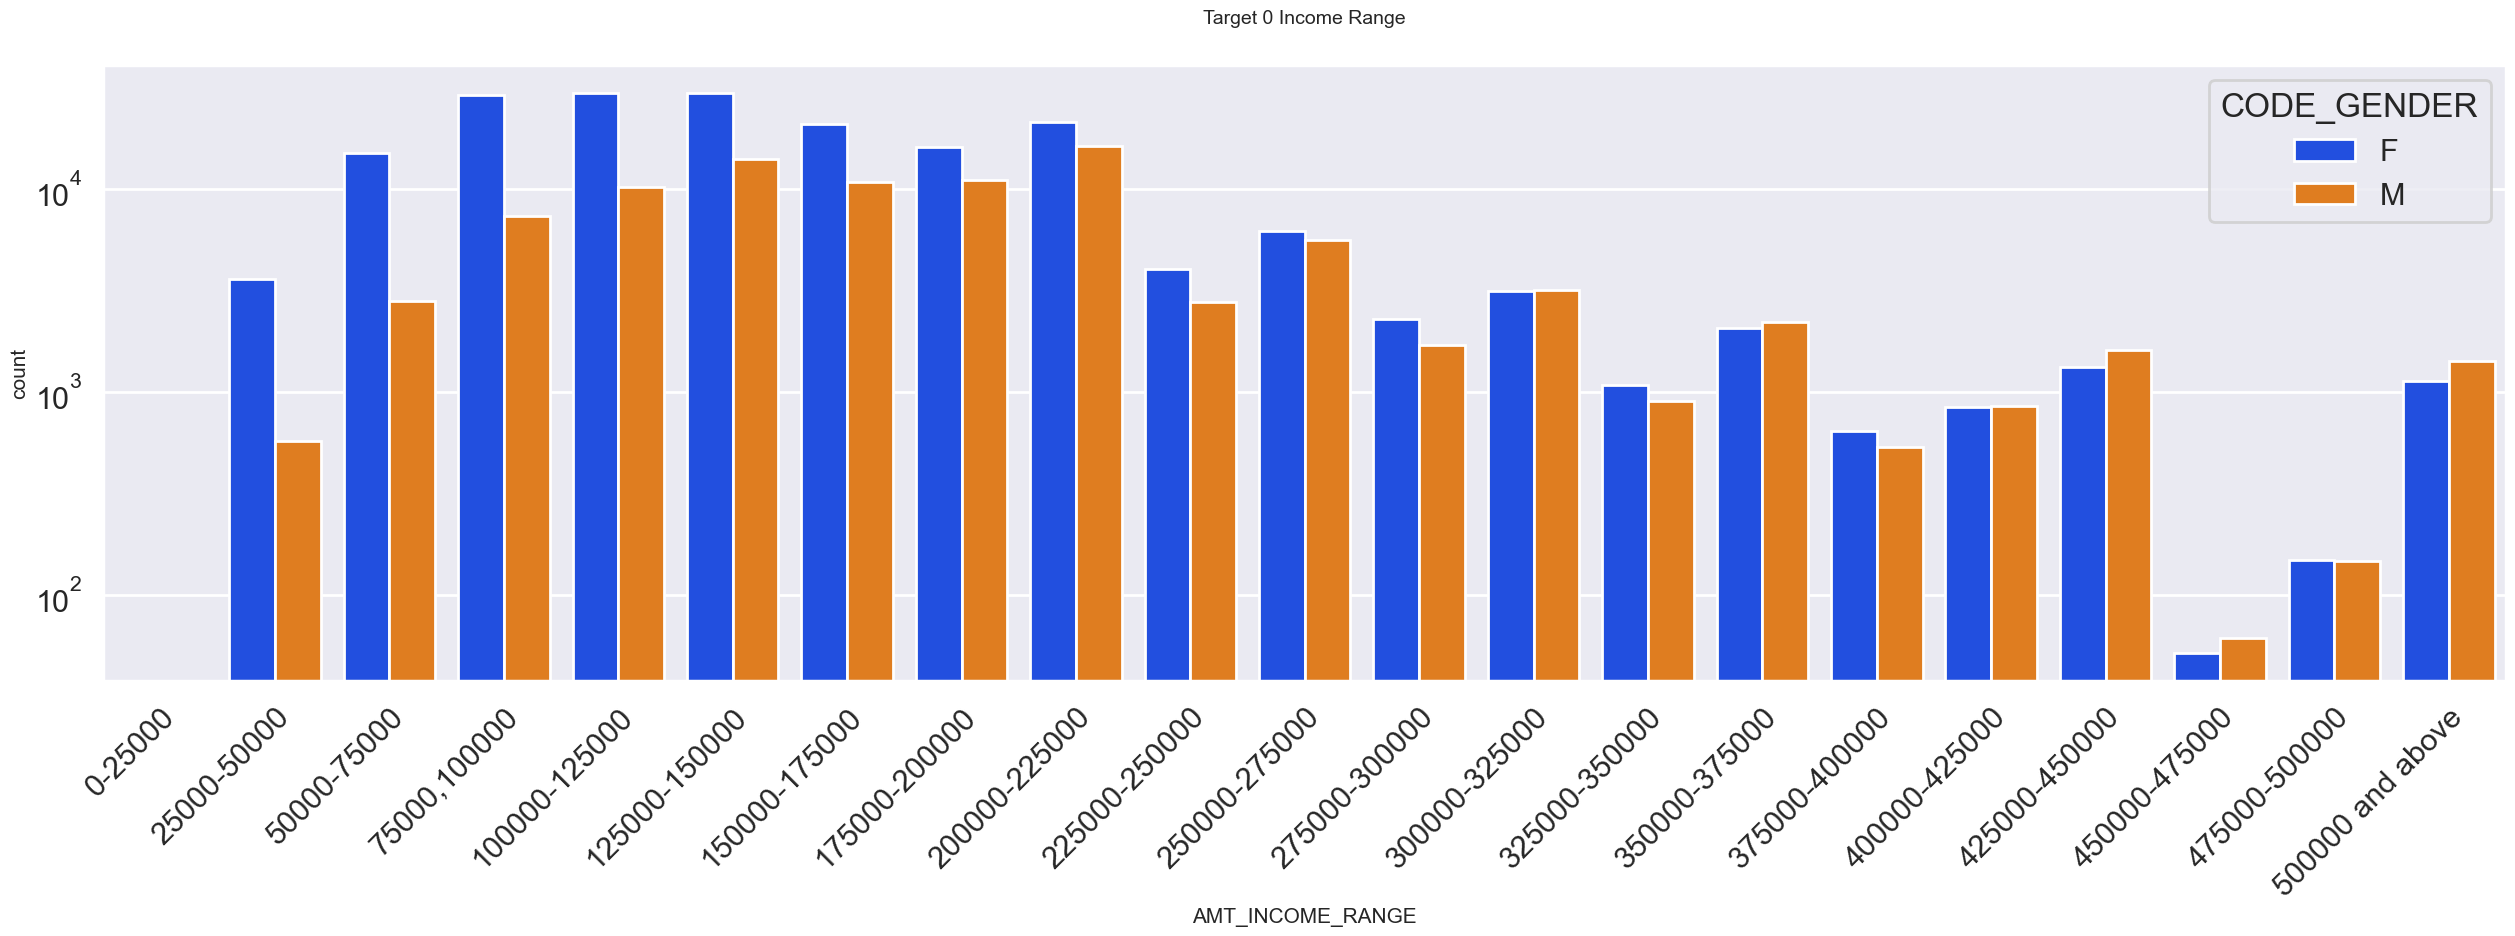

In [96]:
# Plotting for income range for target0
plotfunc(target0,col='AMT_INCOME_RANGE',title='Target 0 Income Range',hue='CODE_GENDER')

**Inference:**<br>
Points to be concluded from the above graph for target=0(Non-Defaulters).
<br>1. Female counts are higher than male.<br>2. This graph show that females are more than male in having credits for that range.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


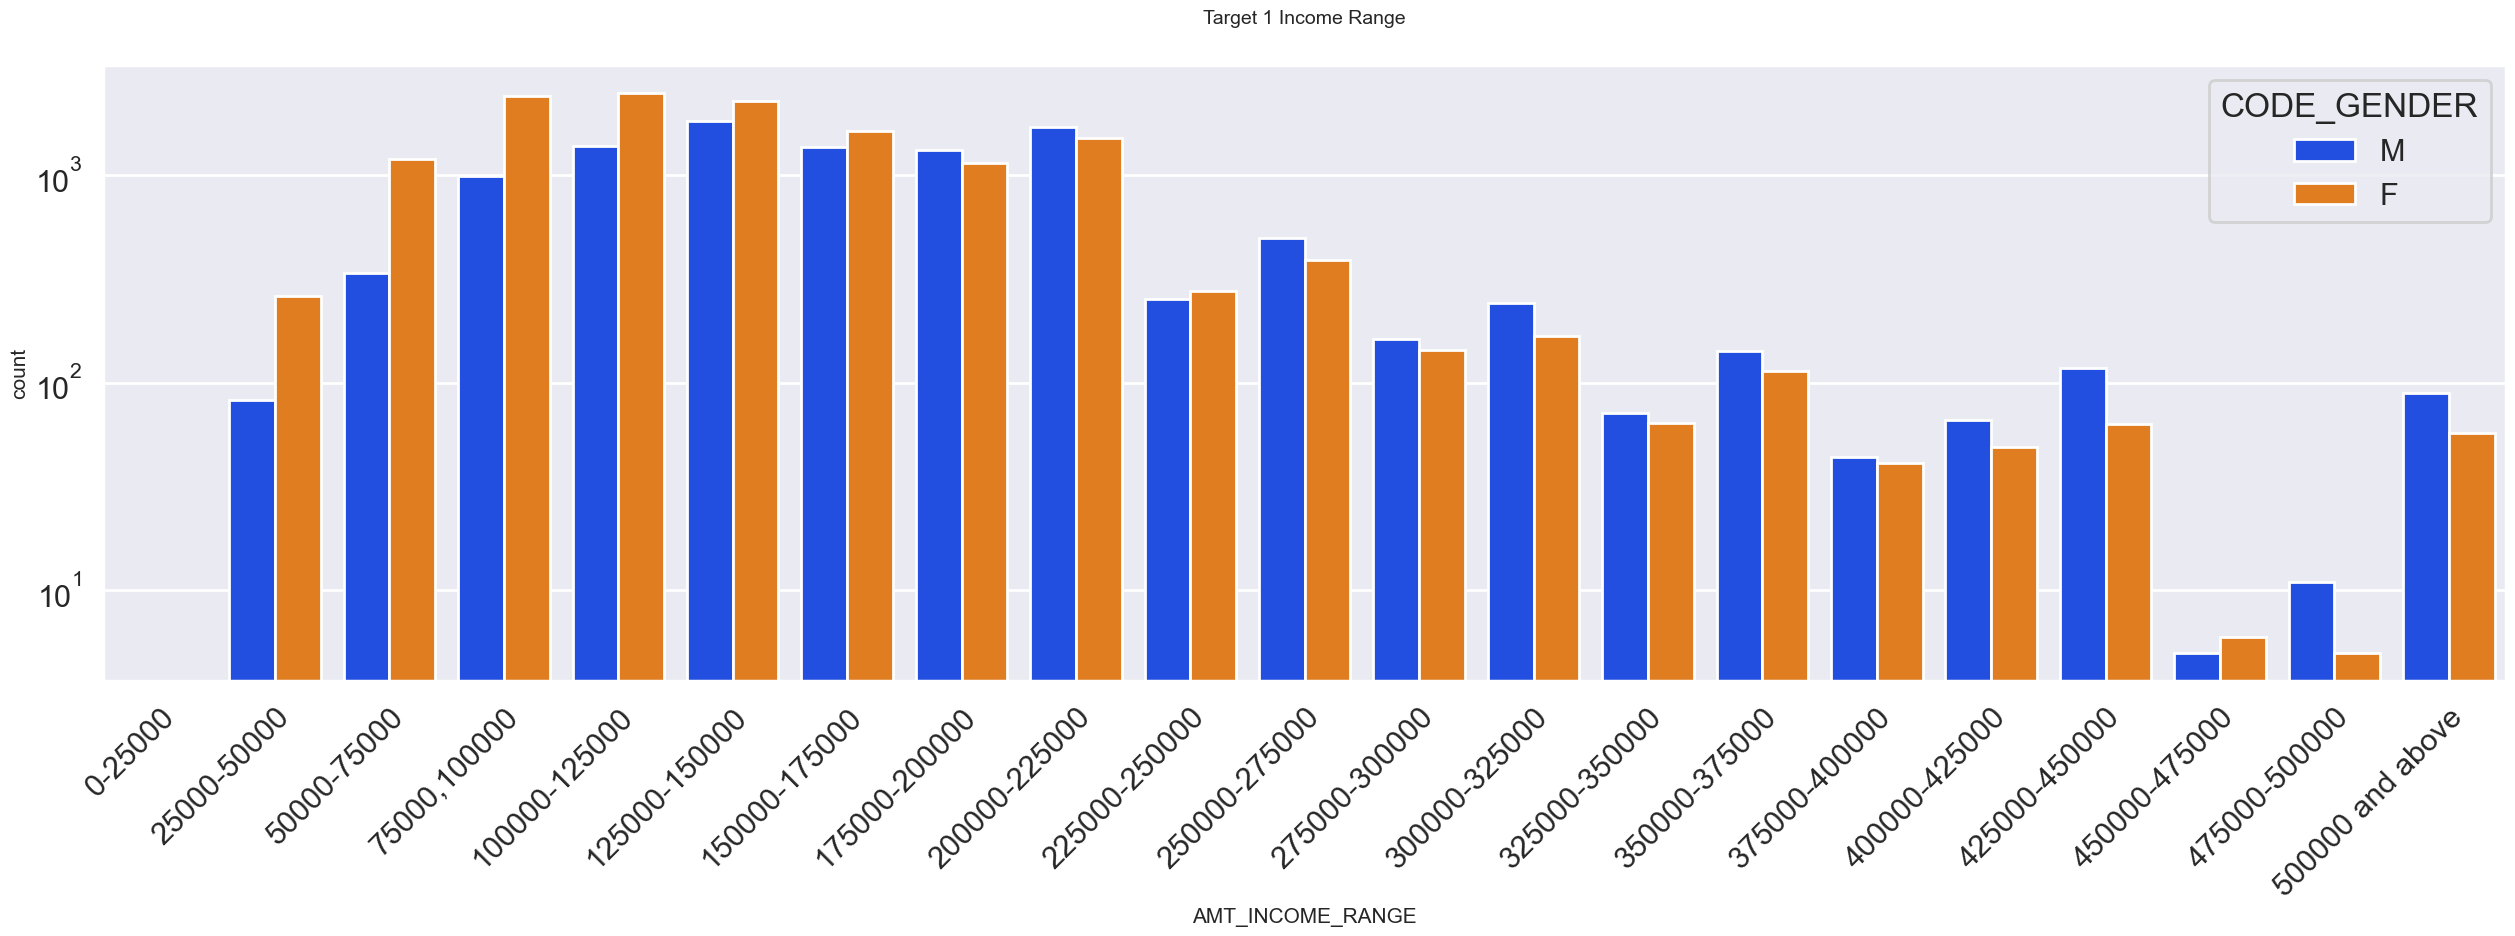

In [97]:
# Plotting for income range for target1
plotfunc(target1,col='AMT_INCOME_RANGE',title='Target 1 Income Range',hue='CODE_GENDER')

**Inference:**
<br>Points to be concluded from the above graph for Target=1 (Defaulters).
<br>1. Male counts are higher than female.
<br>2. This graph show that males are more than female in having credits between 100000 and 200000.

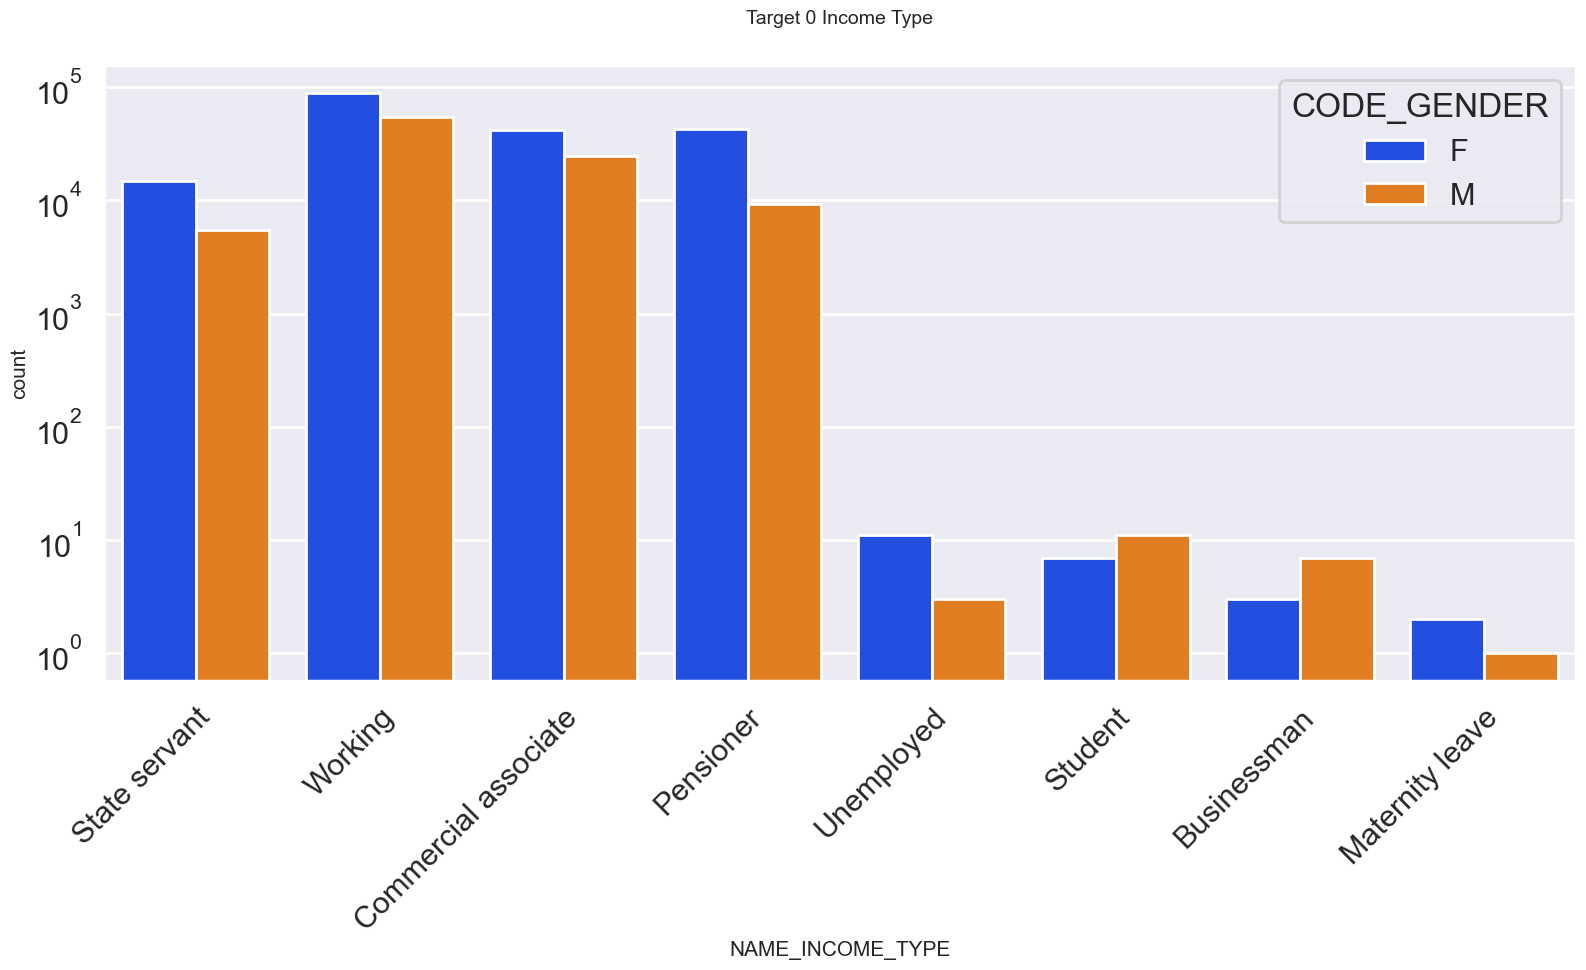

In [98]:
# Plotting for Income type for target 0
plotfunc(target0,col='NAME_INCOME_TYPE',title='Target 0 Income Type',hue='CODE_GENDER')

**Inference:**
<br>Points to be concluded from the above graph for Target=0 (Non-Defaulters).
<br>1. Female are having more credit than males
<br>2. High number of credit for income type working , commercial associate , pensioner and state servant
<br>3. Low number of credit for income type student ,unemployed, businessman and maternity leave

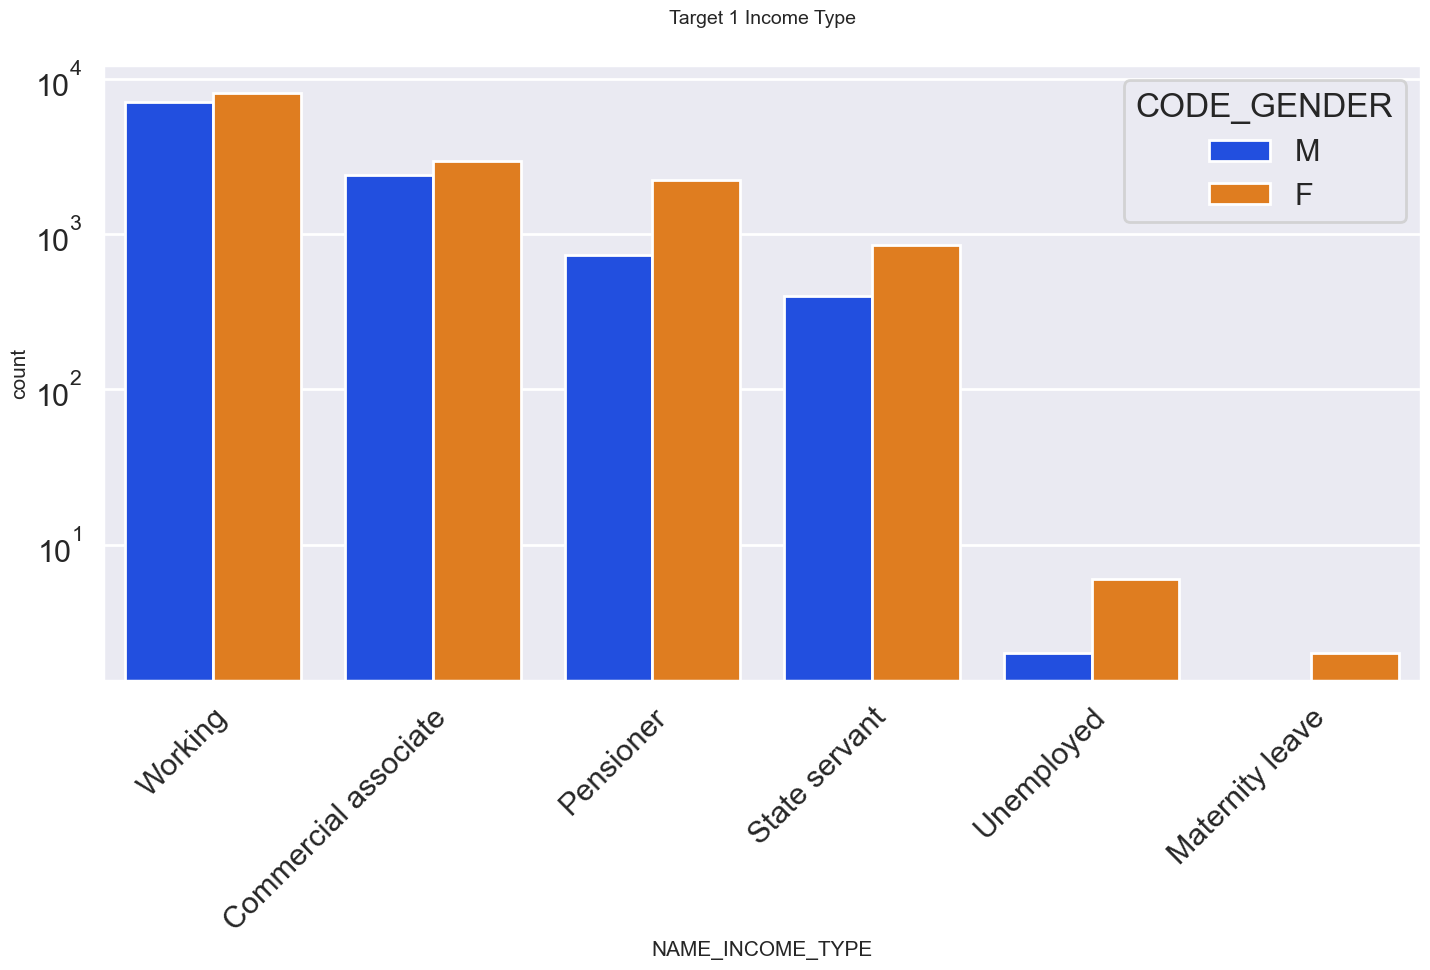

In [99]:
# Plotting for Income Type for target1
plotfunc(target1,col='NAME_INCOME_TYPE',title='Target 1 Income Type',hue='CODE_GENDER')

**Inference:**
<br>Points to be concluded from the above graph for Target=1 (Defaulters).
<br>1. High number of credit for income type working , commercial associate , pensioner and state servant.Same as of target0
<br>2. Low number of credit for income type unemployed and maternity leave

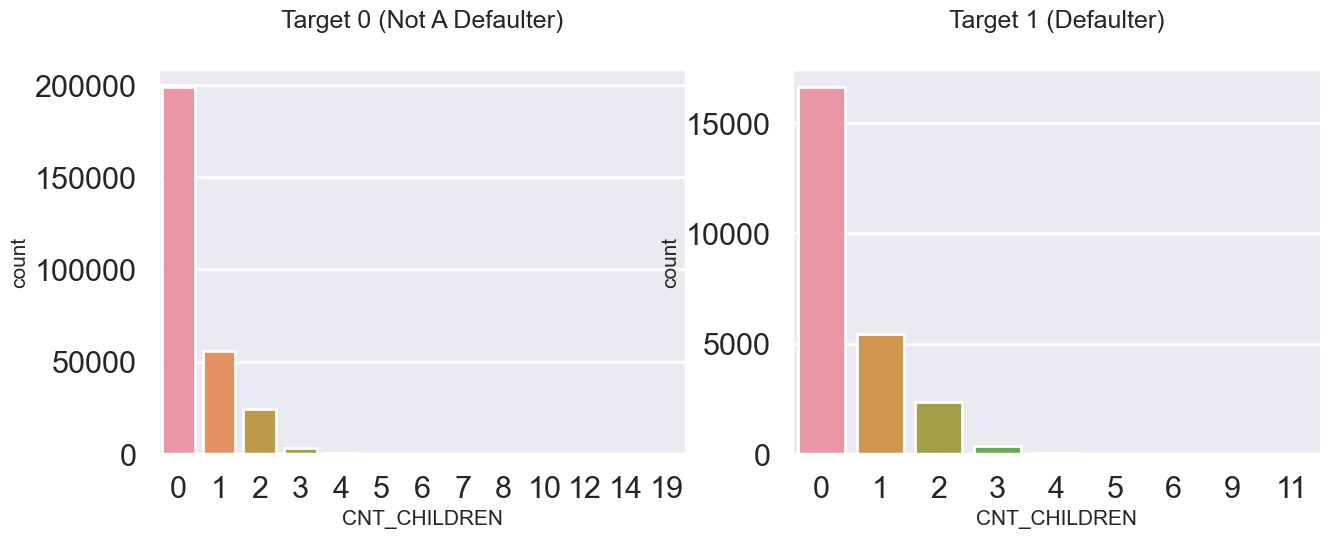

In [101]:
# Plotting for CNT_CHILDREN for target0 and target1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='CNT_CHILDREN', data=target0, ax=ax[0]).set_title('Target 0 (Not A Defaulter)')
sns.countplot(x='CNT_CHILDREN', data=target1, ax=ax[1]).set_title('Target 1 (Defaulter)')

plt.show()

**Inference**
<br>Points to be concluded from the above graph:
<br>1. We can see that low child count maximizes that chances of both being a defaulter and also non defaulter. So        we cannot conclude any specifics from this exploration.

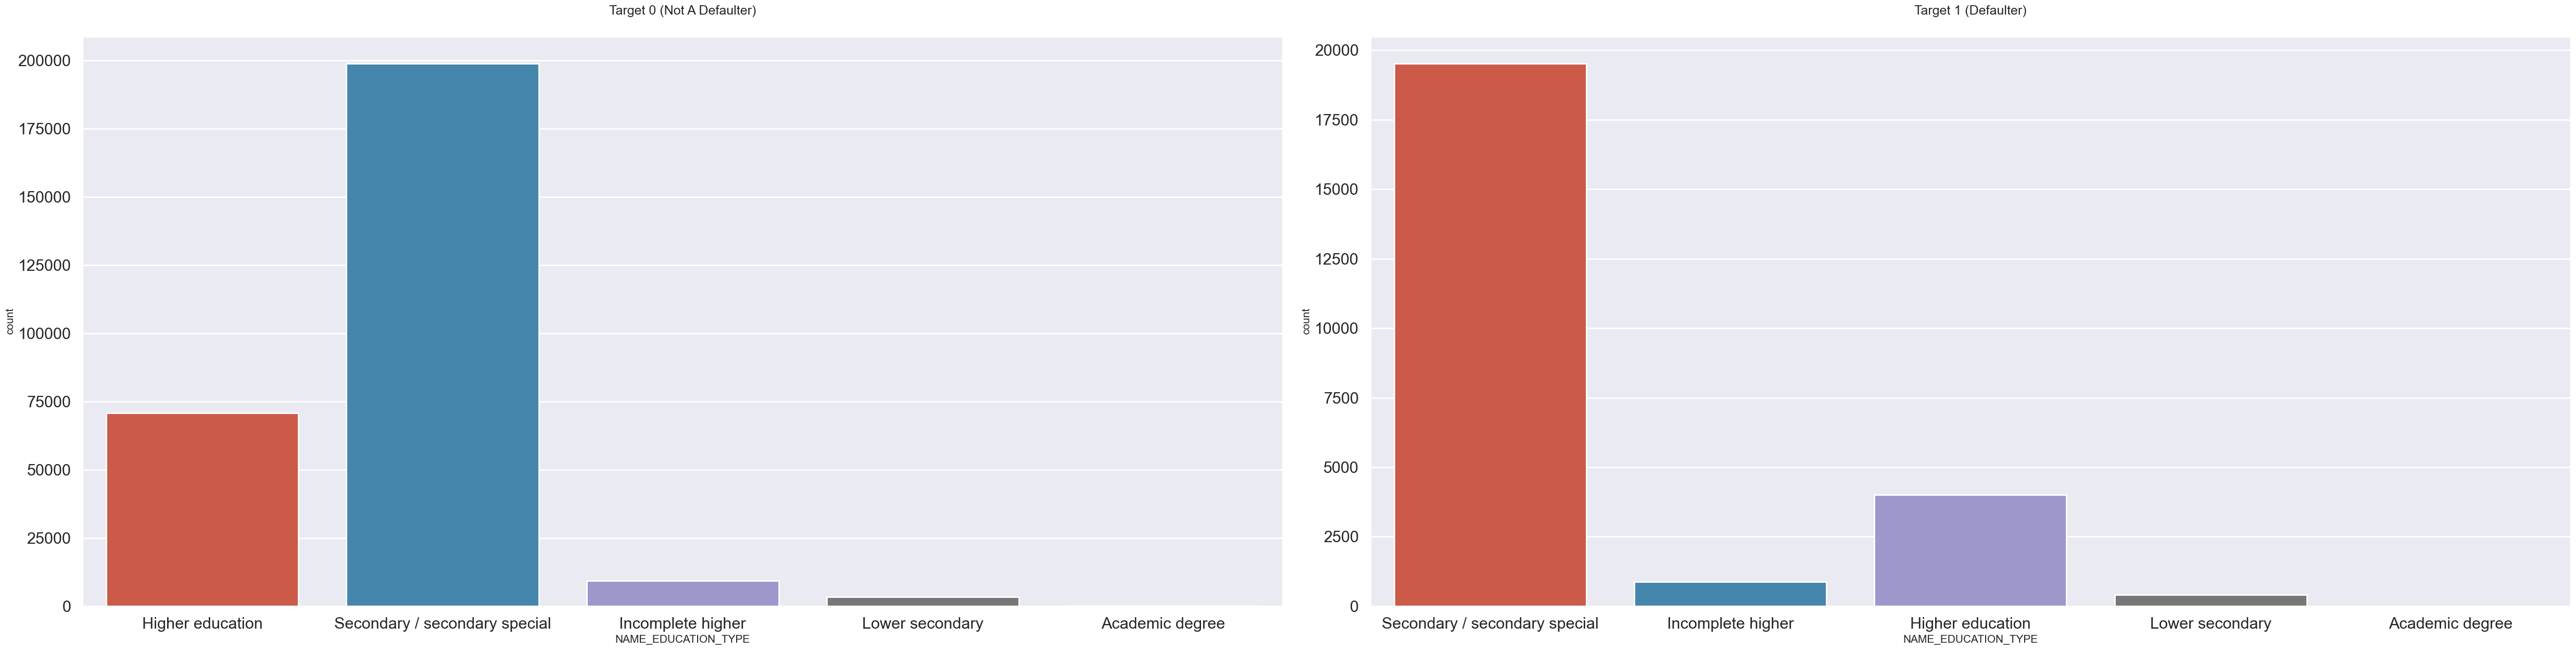

In [104]:
# Plotting for NAME_EDUCATION_TYPE for target0 and target1
fig, ax = plt.subplots(1,2,figsize=(50,13))  # Adjusted the figsize to be more reasonable

sns.countplot(x='NAME_EDUCATION_TYPE', data=target0, ax=ax[0]).set_title('Target 0 (Not A Defaulter)')
sns.countplot(x='NAME_EDUCATION_TYPE', data=target1, ax=ax[1]).set_title('Target 1 (Defaulter)')

plt.tight_layout()  # Ensures that labels and titles fit within the plot area
plt.show()

**Inference:**
<br>Points to be concluded from the above graph :
<br>1. From this comparison we can see that people with secondary education has defaulted the most.

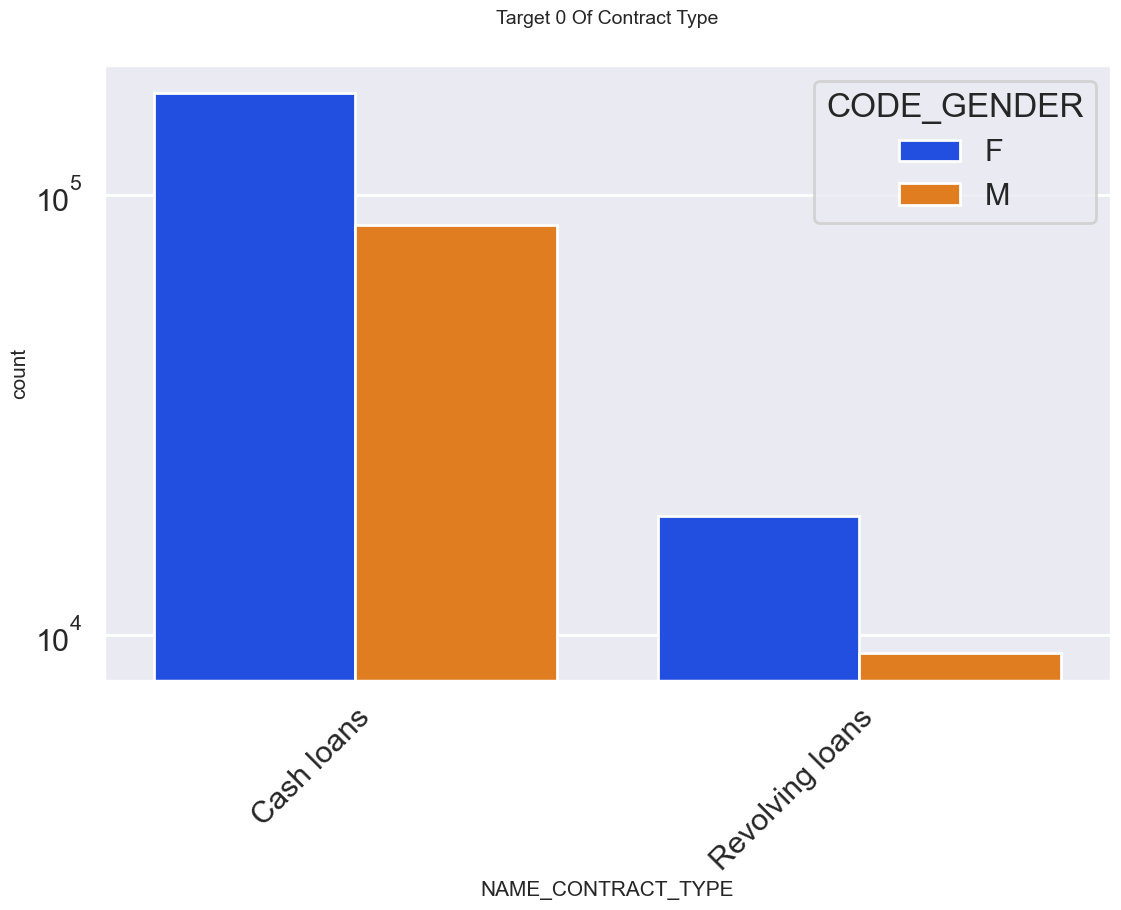

In [105]:
#Plotting for NAME_CONTRACT_TYPE for target0
plotfunc(target0,col='NAME_CONTRACT_TYPE',title='Target 0 Of Contract Type',hue='CODE_GENDER')

**Inference**
<br>Points to be concluded from the above graph for Target=0 (Non-Defaulters).
<br>1. Cash Loan contracts have a higher number of credit than revolving loan contracts
<br>2. Count of female is more

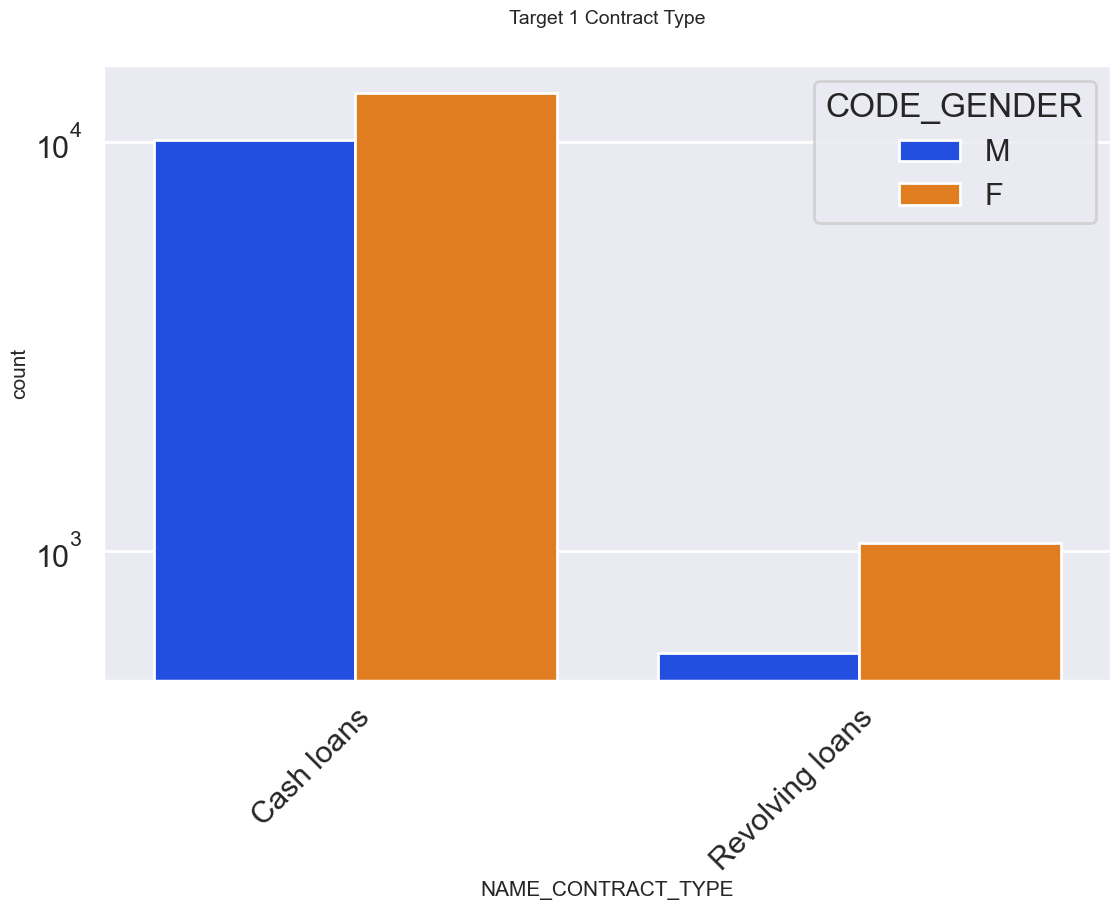

In [106]:
#Plotting for NAME_CONTRACT_TYPE for target1
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 1 Contract Type',hue='CODE_GENDER')

**Inference:**
<br>Points to be concluded from the above graph for Target = 1 (Defaulters).
<br>1. Cash Loan contracts have a higher number of credit than revolving loan contracts
<br>2. There is only female revolving loans.

Continuous Univariate Analysis

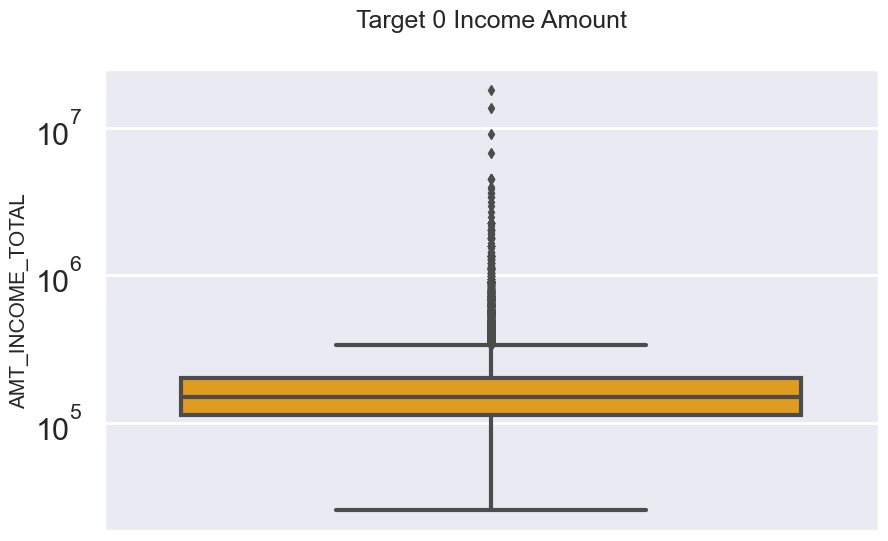

In [110]:
def cusBoxPlot(data, col, title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y=col, color="orange")
    plt.yscale('log')
    plt.title(title)
    plt.ylabel(col)
    plt.show()

# Distribution of income amount for Target0
cusBoxPlot(data=target0, col='AMT_INCOME_TOTAL', title='Target 0 Income Amount')

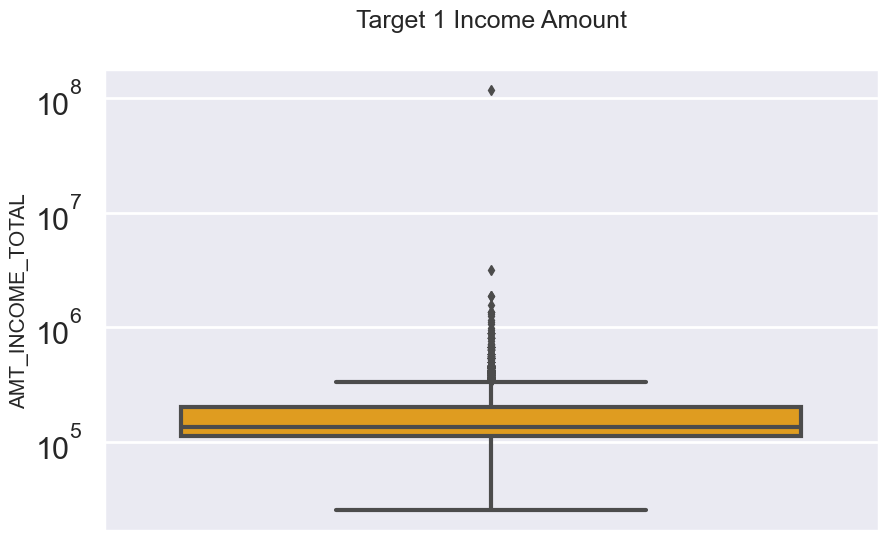

In [111]:
# Distribution of income amount for Target1
cusBoxPlot(data=target1,col='AMT_INCOME_TOTAL',title='Target 1 Income Amount')

**Inference:**
<br>Points to be concluded from the above 2 graph
<br>1. Outliners are present in both
<br>2. 3rd quartile is narrow for both target 1 and target 0
<br>3. Most of the clients have income in the 1st quartile

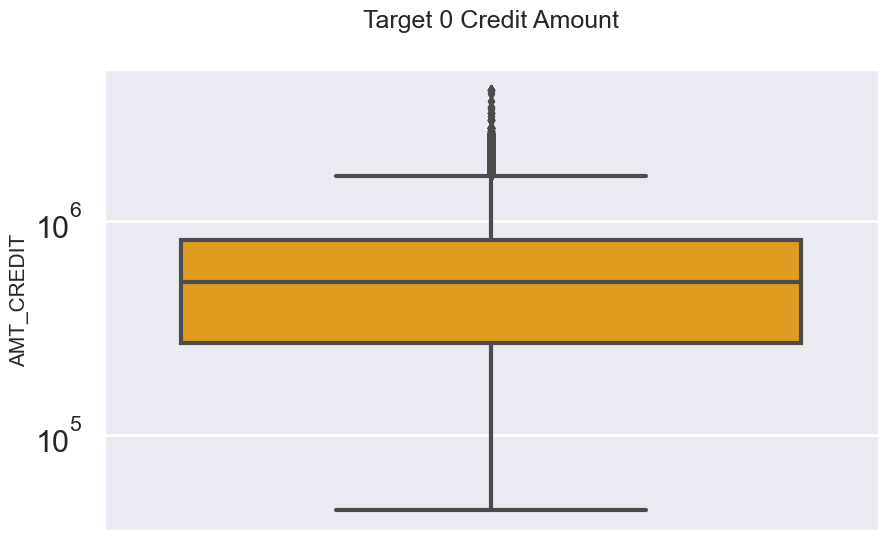

In [112]:
# Disrtibution of credit amount for Target 0
cusBoxPlot(data=target0,col='AMT_CREDIT',title='Target 0 Credit Amount')

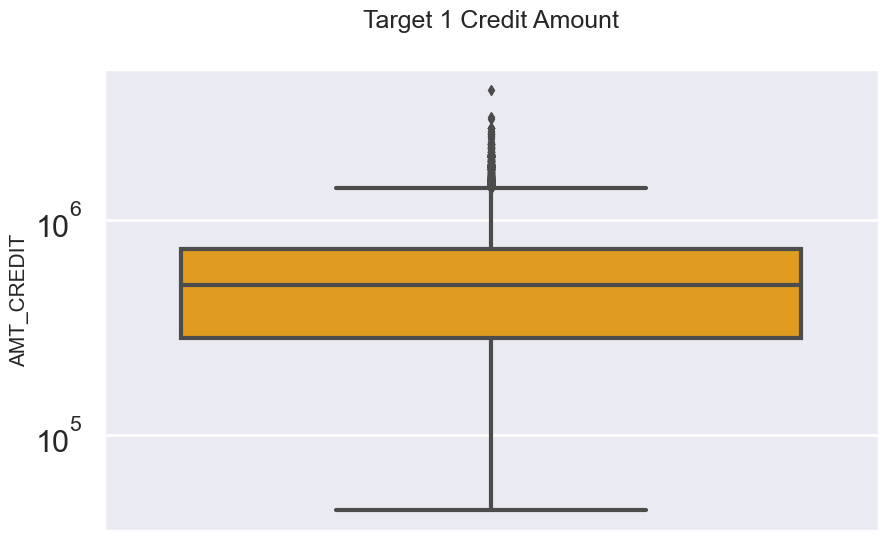

In [113]:
# Disrtibution of credit amount for Target 1
cusBoxPlot(data=target1,col='AMT_CREDIT',title='Target 1 Credit Amount')

**Inference:**
<br>Points to be concluded from the above 2 graph
<br>1. Outliners are present in both
<br>2. 3rd quartile is narrow for both target 1 and target 0
<br>3. Most of the clients have credit amount in the 1st quartile

**Bivariate Analysis** <br>
**Analysing correlation for numerical columns for both Target 0 and Target1**<br>

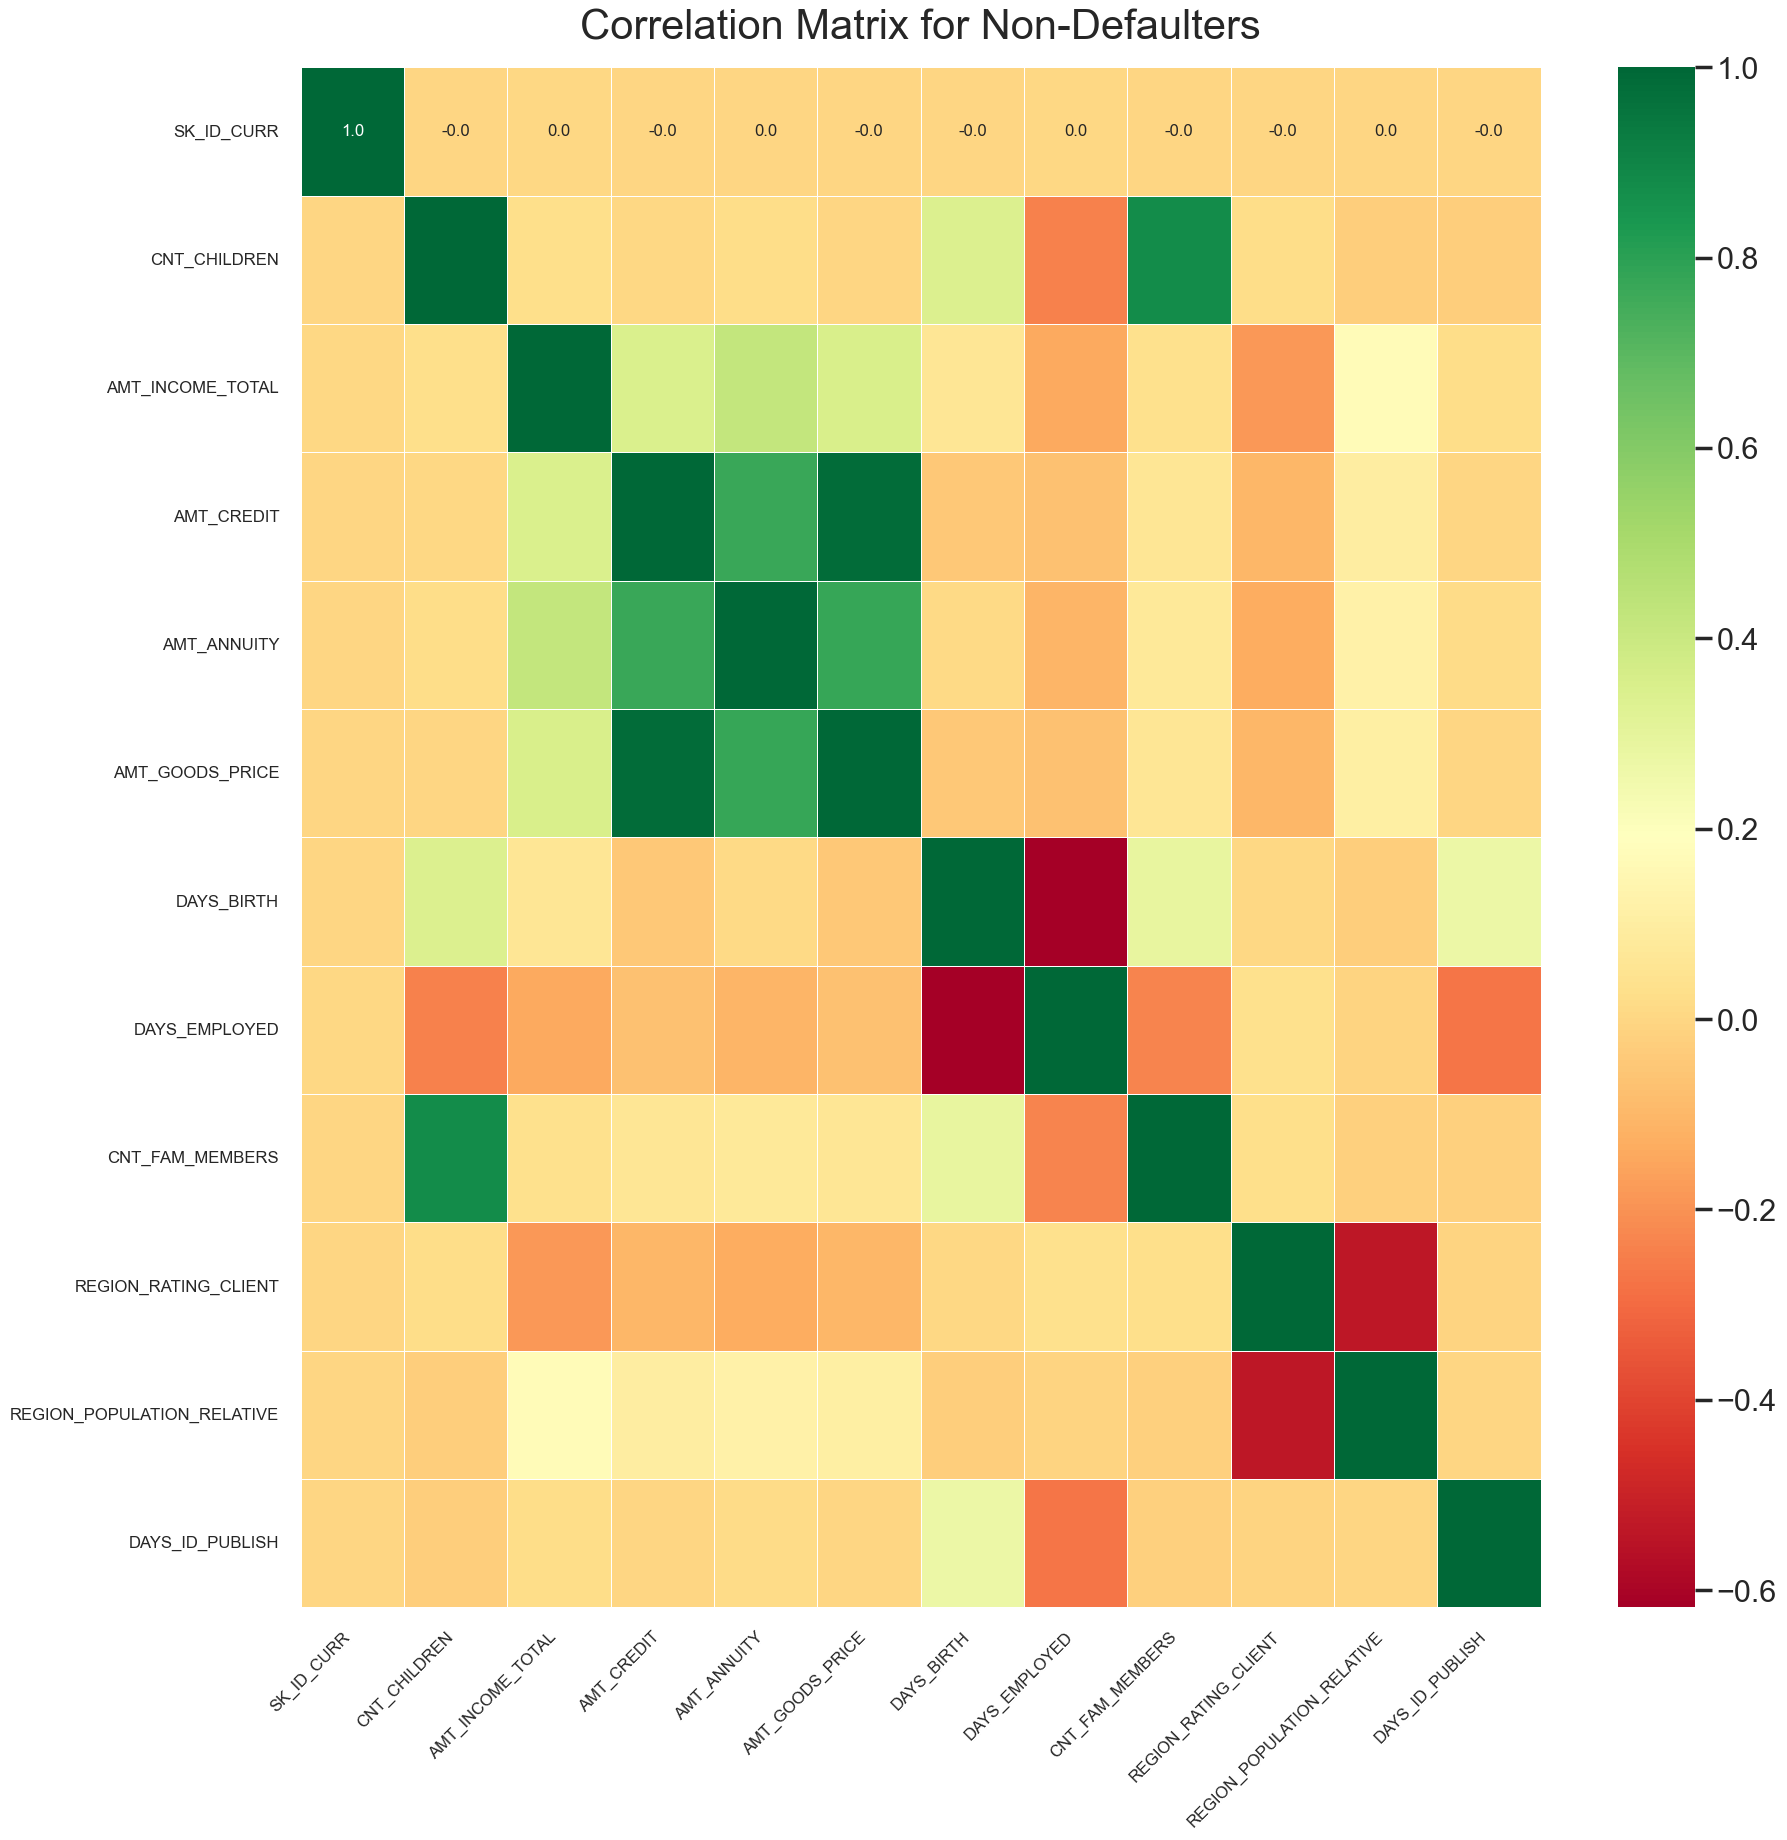

In [116]:
#Plotting Correlation matrix for Target 0 application data
d = target0[['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
             'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
             'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH']]

# Create the correlation matrix
corr_matrix = d.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20), dpi=100)  # Set a higher resolution with dpi
heatmap = sns.heatmap(corr_matrix, fmt='.1f', cmap="RdYlGn", annot=True, annot_kws={"size": 12}, linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix for Non-Defaulters", fontsize=30, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Display the plot
plt.show()

**Inference:**<br>These columns have high correlation values for Target 0.**<br><br>
AMT_GOODS_PRICE and AMT_CREDIT<br>AMT_ANNUITY and AMT_CREDIT<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>CNT_FAM_MEMBERS and CNT_CHILDREN<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_INCOME_TOTAL and AMT_GOODS_PRICE

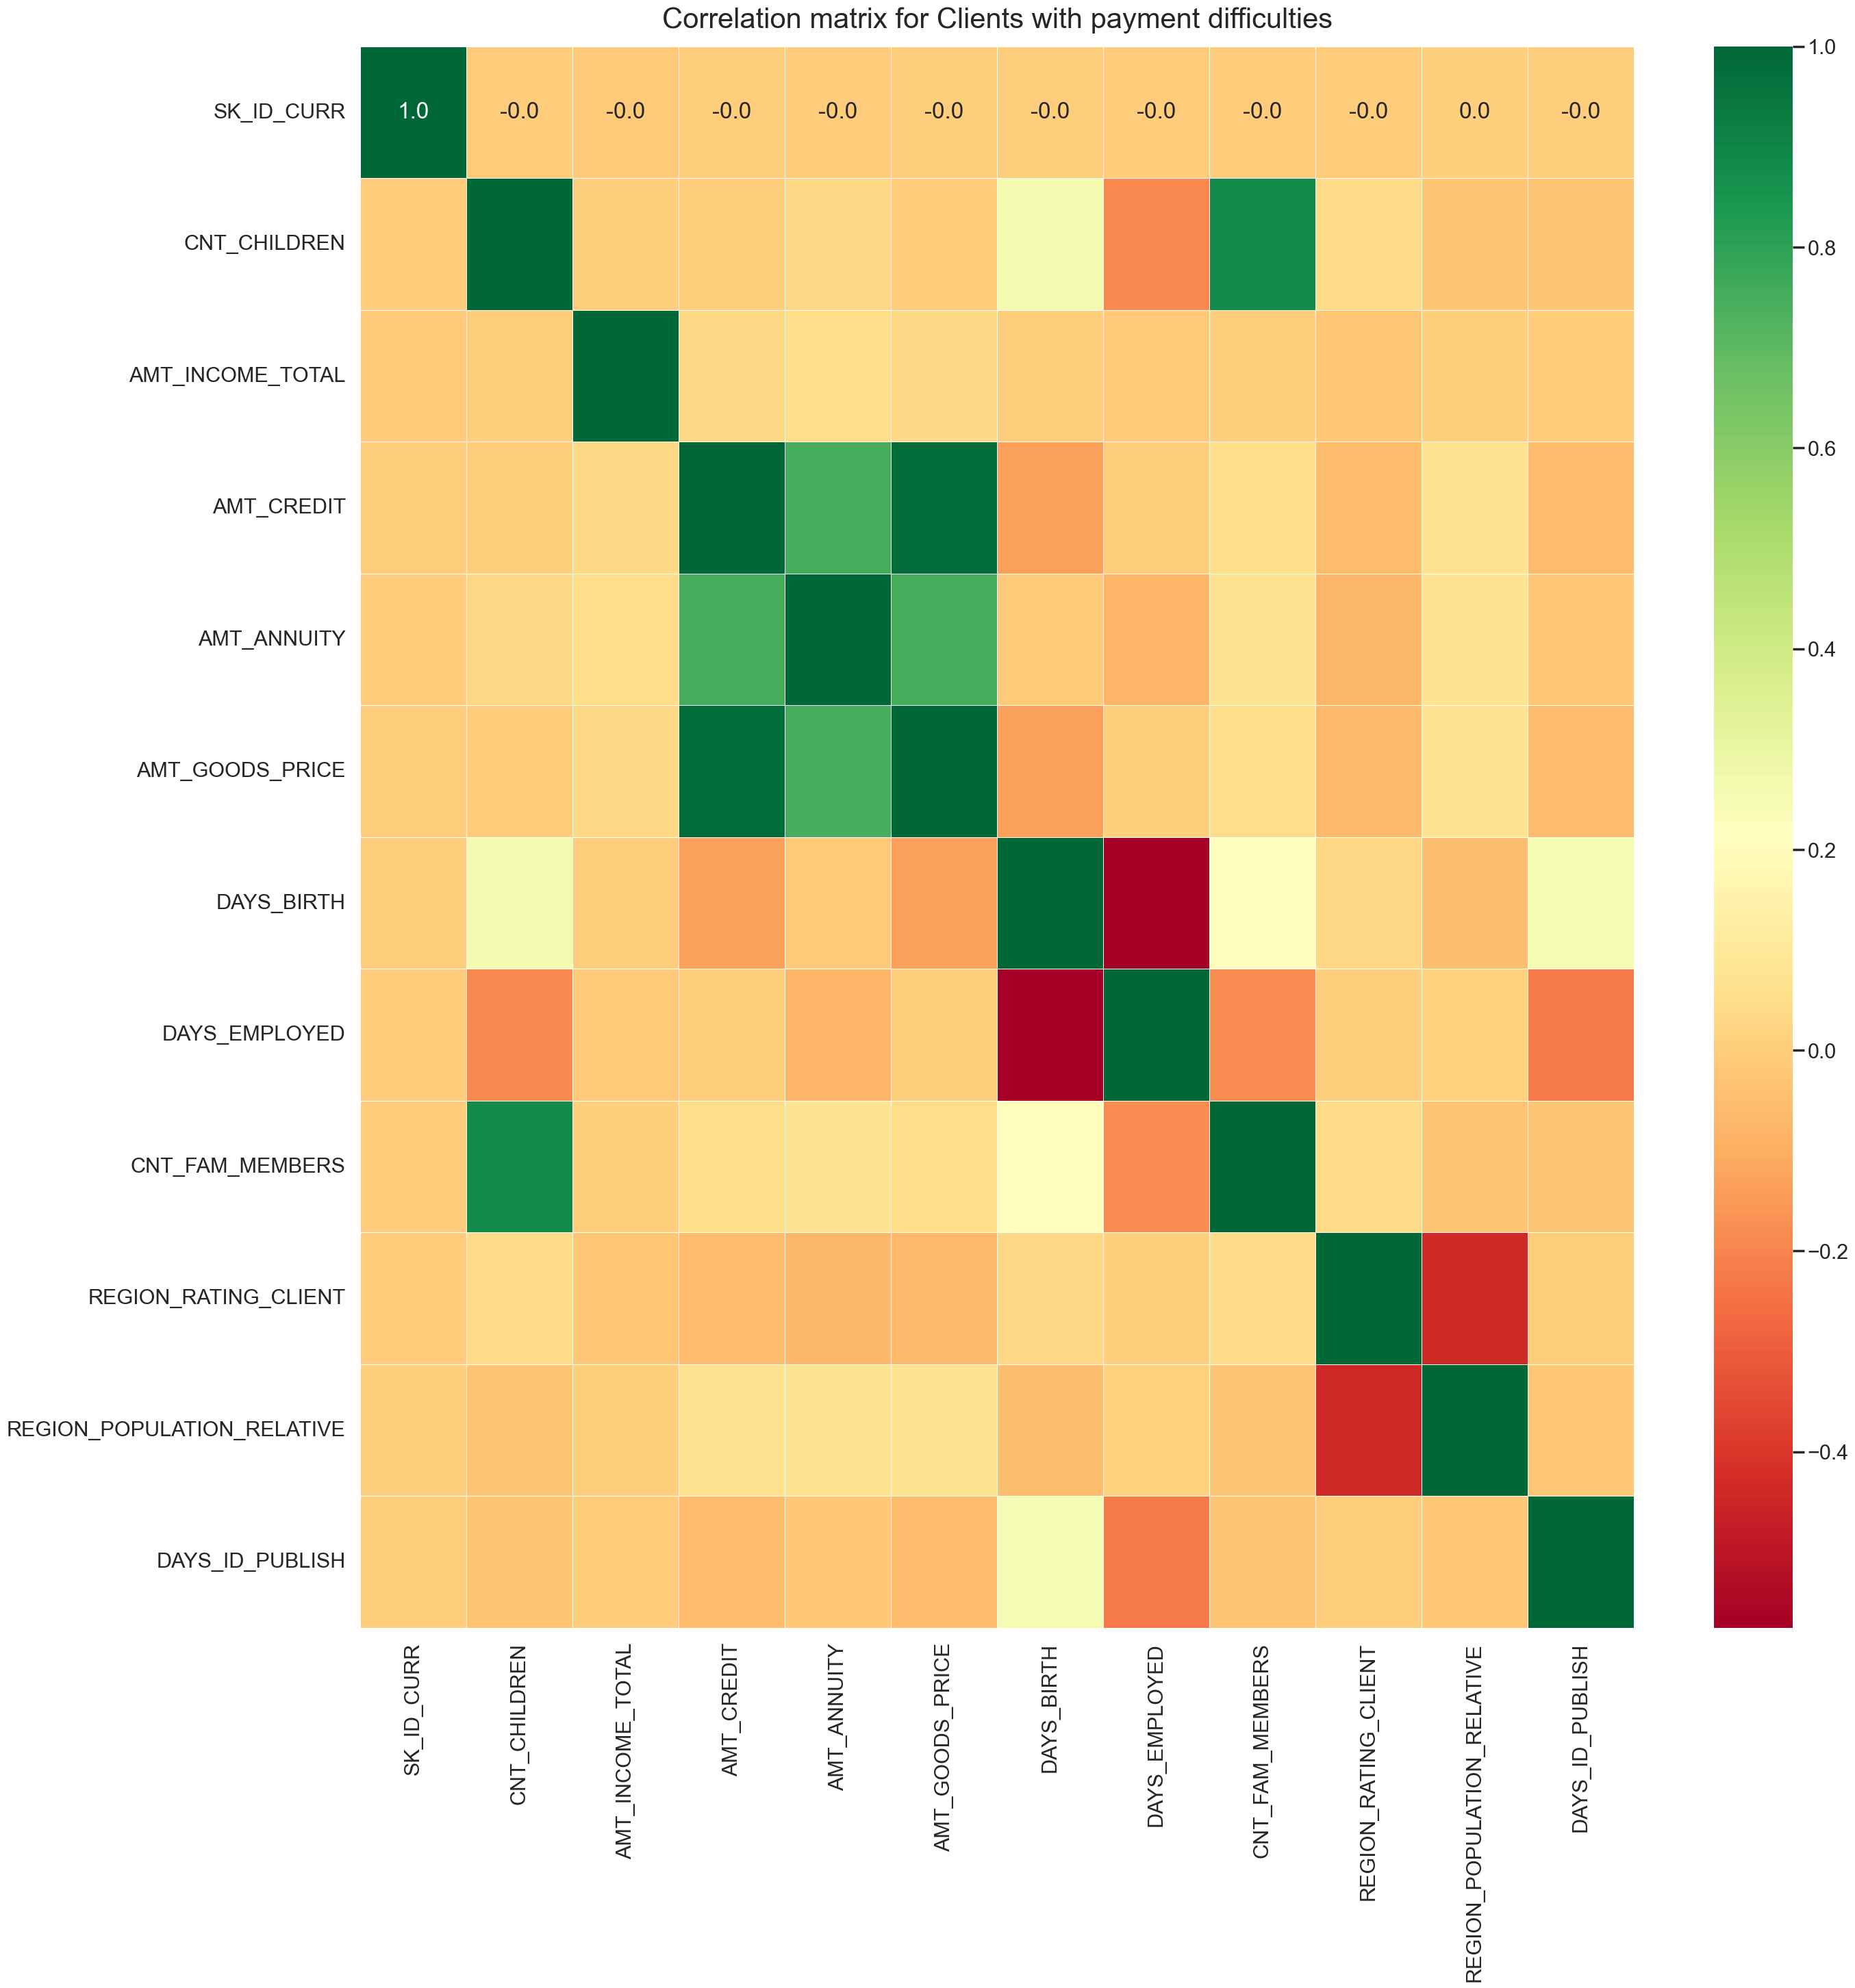

In [117]:
#Plotting Correlation matrix for Target 1 application data
d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

**Inference:<br>**Both for Target 0 and Target 1 these columns have high correlation values.<br><br>
AMT_GOODS_PRICE and AMT_CREDIT<br>AMT_ANNUITY and AMT_CREDIT<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>CNT_FAM_MEMBER and CNT_CHILDREN<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_INCOME_TOTAL and AMT_GOODS_PRICE

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


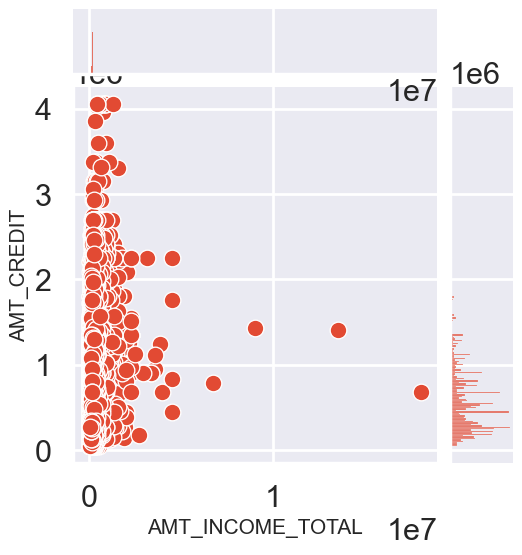

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting income vs credit for Target 0
sns.jointplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=target0, kind='scatter')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


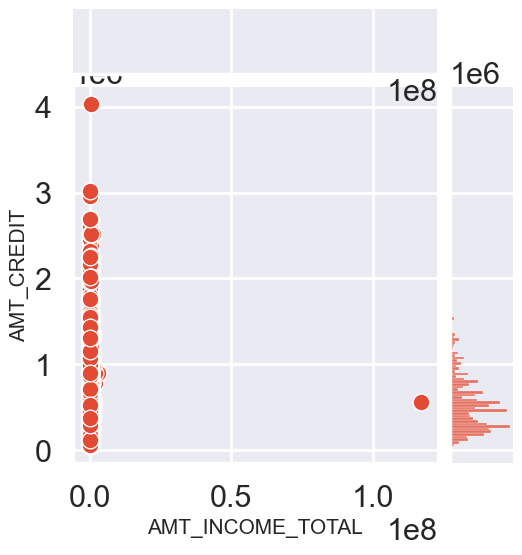

In [123]:
sns.jointplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=target1, kind='scatter')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


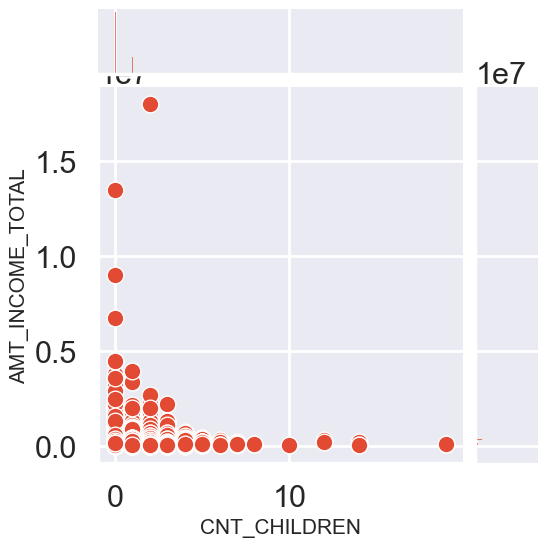

In [125]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 0
sns.jointplot(x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', data=target0, kind='scatter')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


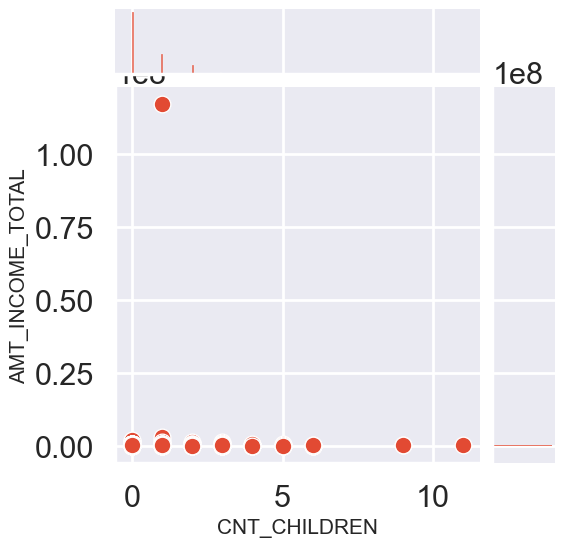

In [126]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 1
sns.jointplot(x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', data=target1, kind='scatter')
plt.show()

**1. Analysis of Credit amount with respect to Education status**

Text(0.5, 1.0, 'Credit Amount vs Education Status For Traget 0')

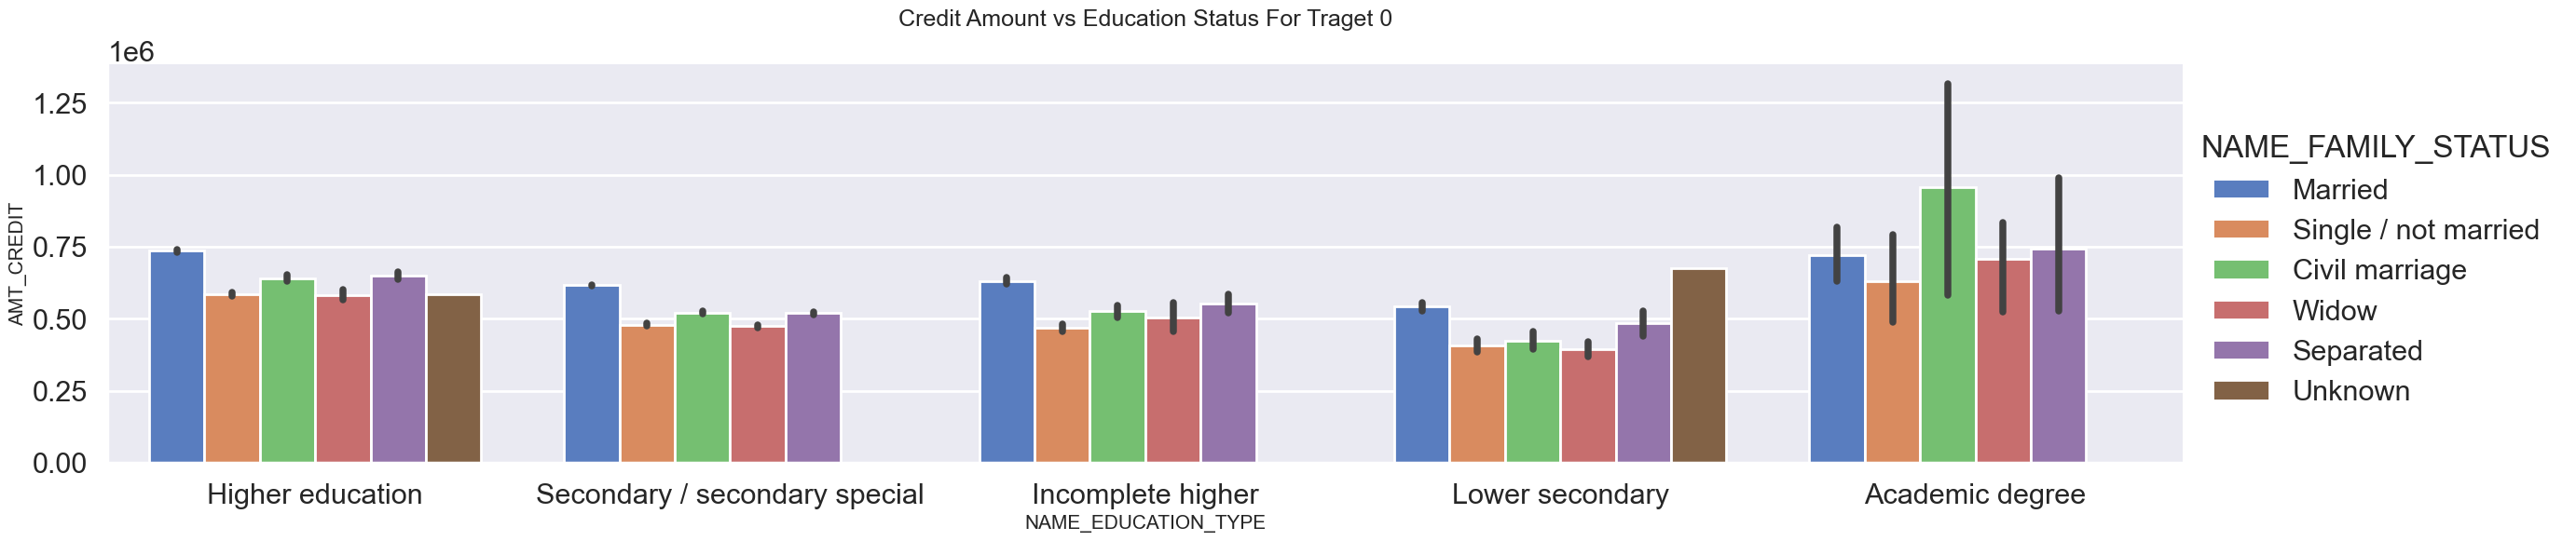

In [127]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status For Traget 0')

**Inference:**
<br>Points to be concluded from the above graph for target = 0 (Non-Defaulters).
<br>1. Customers holding academic degree have greater credit amount, Civil marriage segment being the highest among them.
<br>2. Lower educated customers tends to have lower credit amount, Widows being the lowest among them
<br>3. Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.

Text(0.5, 1.0, 'Credit Amount vs Education Status for Traget 1')

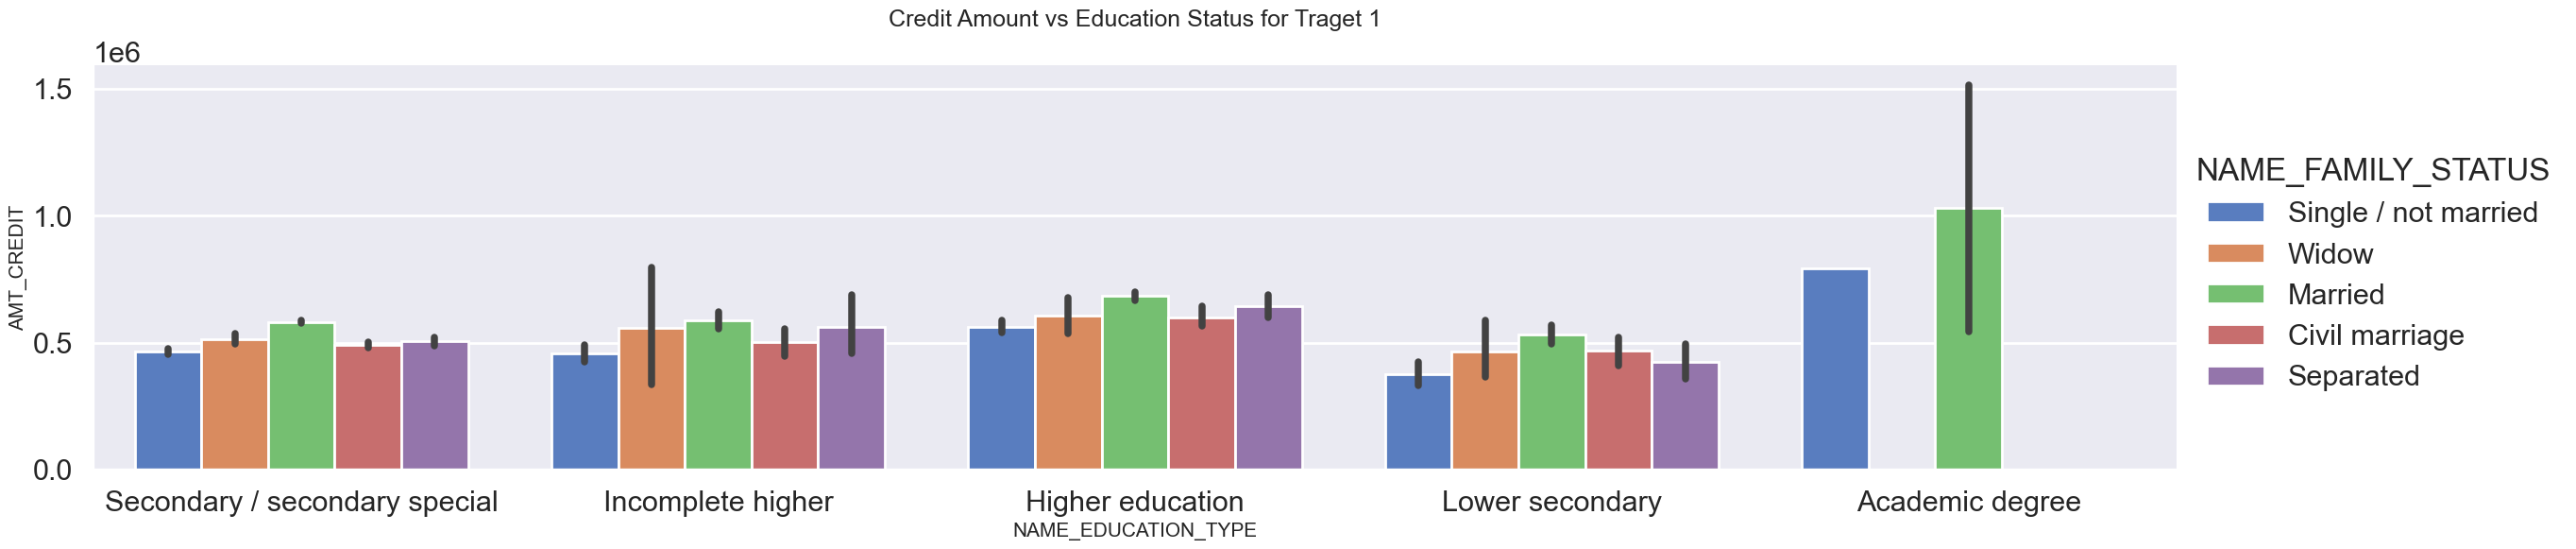

In [128]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target 1
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status for Traget 1')

**Inference:**
<br>Points to be concluded from the above graph for target = 1 (Defaulters).
<br>1. Married Academic degree holding customers generally have a higher credit amount and so their defaulting rate is also high
<br>2. Accross all education segment married customer tends to have higher credit amount
<br>3. Customers holding lower eductation tends to have a lower credit amount
<br>4. Single and Married are the only 2 family types present in academic degree .

**2. Analysis of Income amount with respect to Education Status**

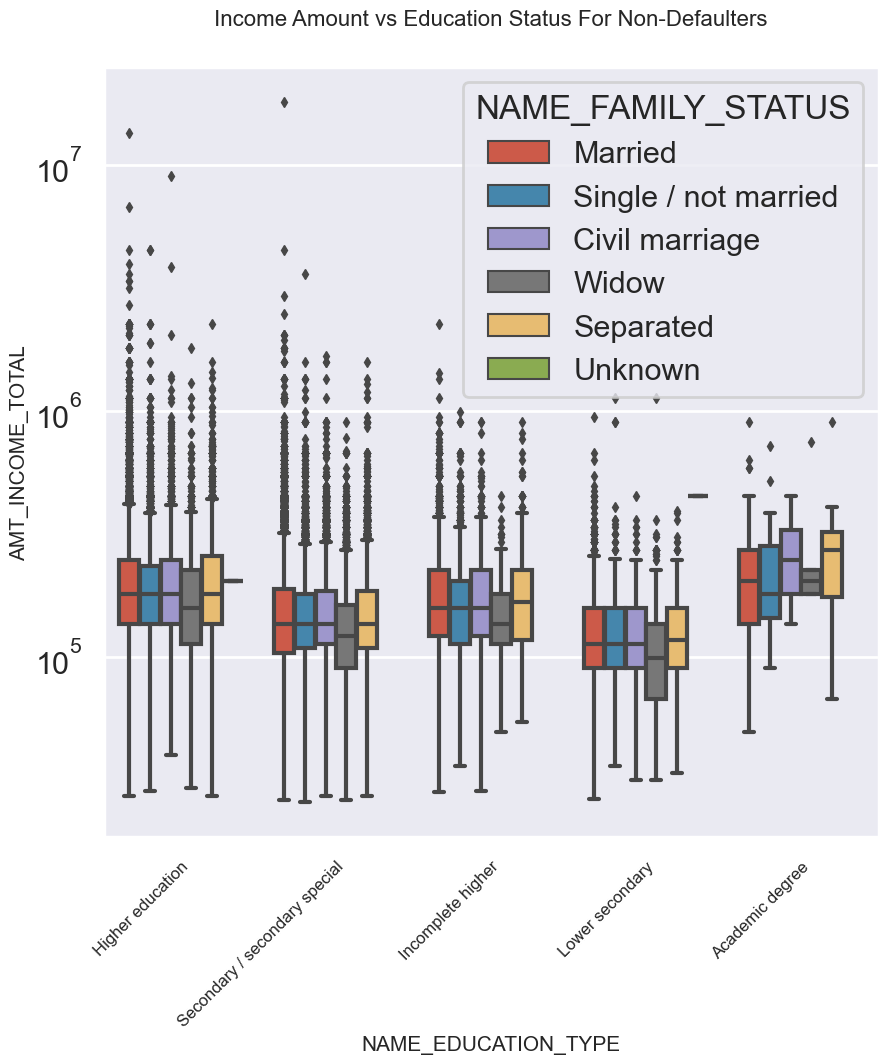

In [129]:
# Box plotting for Income amount vs Education Status for Target 0 in logarithmic scale

import textwrap
plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
g1=sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=16)
plt.show()

**Inference:**
<br>Points to be concluded from the above graph for target = 0 (Non-Defaulters).
<br>1. For Education type 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.
<br>2. Less outlier are having for Academic degree but they are having the income amount is little higher that Higher education.
<br>3. Lower secondary of civil marriage family status are have less income amount than others.

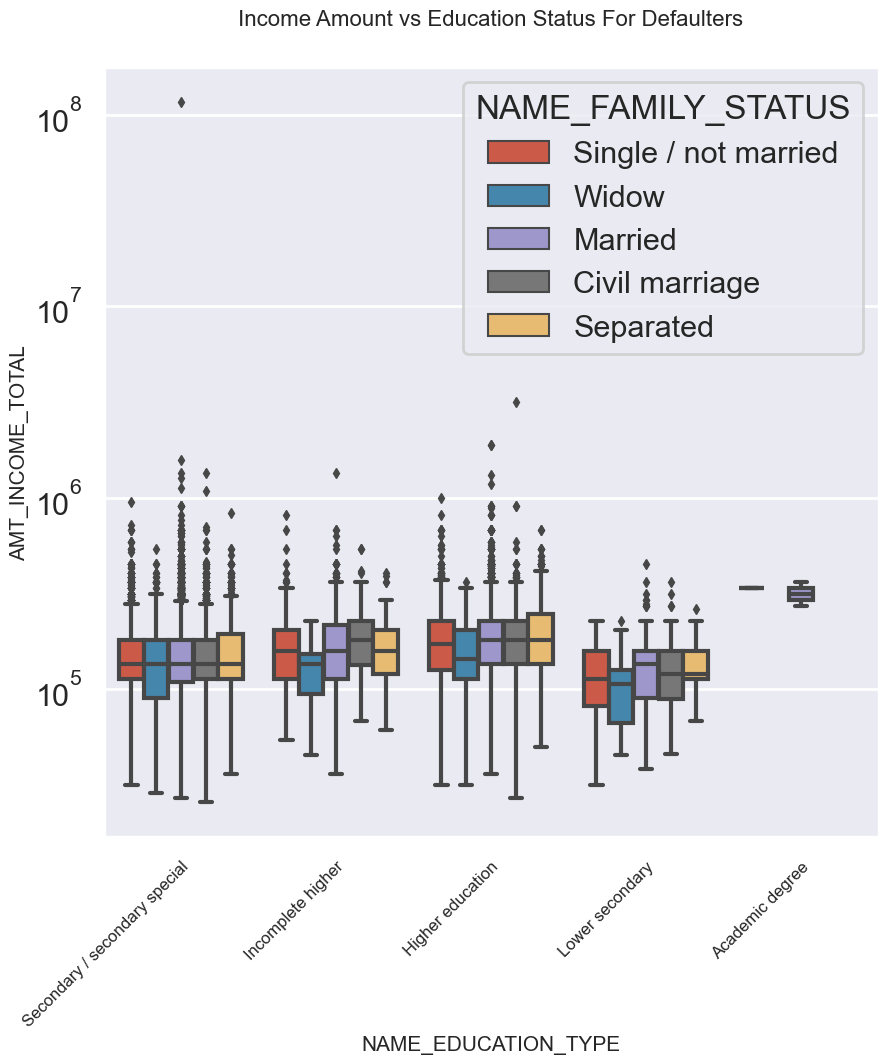

In [130]:
# Box plotting for Income amount vs Education Status for Target 1 in logarithmic scale

plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Defaulters',fontsize=16)
plt.show()

**Inference:**
<br>Points to be concluded from the above graph for target = 1 (Defaulters).
<br>1. Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.
<br>2. No outlier for Academic degree but there income amount is little higher than that Higher education.
<br>3. Lower secondary are having less income amount than others.

## Segment2 - previous_application

In [133]:
#Read the dataset of "application_data" in inp0 dataframe
inp1=pd.read_csv("C:\\Users\\medin\\Downloads\\Assignment\\previous_application.csv")

In [134]:
#Display the first 5 records
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#check shape of the dataframe
inp1.shape

(1670214, 37)

In [136]:
#check info of the dataframe
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [137]:
#check datatypes of each field in dataframe
inp1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [138]:
# Cleaning the missing data
# listing the null values columns having more than 50%

emptycol1=inp1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.5*len(emptycol1))]
len(emptycol1)

15

In [139]:
#Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.5].index)
inp1.drop(labels=emptycol1,axis=1,inplace=True)
inp1.shape

(1670214, 22)

In [140]:
#Removing the column values of 'XNA' and 'XAP'
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
inp1.shape

(69635, 22)

In [143]:
#Merging the Application dataset with previous appliaction dataset
Merged_data = pd.merge(left=inp0, right=inp1, how='inner', on='SK_ID_CURR', suffixes=('_left', '_right'))


In [145]:
Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_left,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_left,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_left,HOUR_APPR_PROCESS_START_left,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_right,AMT_APPLICATION,AMT_CREDIT_right,WEEKDAY_APPR_PROCESS_START_right,HOUR_APPR_PROCESS_START_right,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,1,1,0,1,0,0,

In [146]:
# Renaming the column names after merging
Merged_data = Merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

## Performing univariate analysis

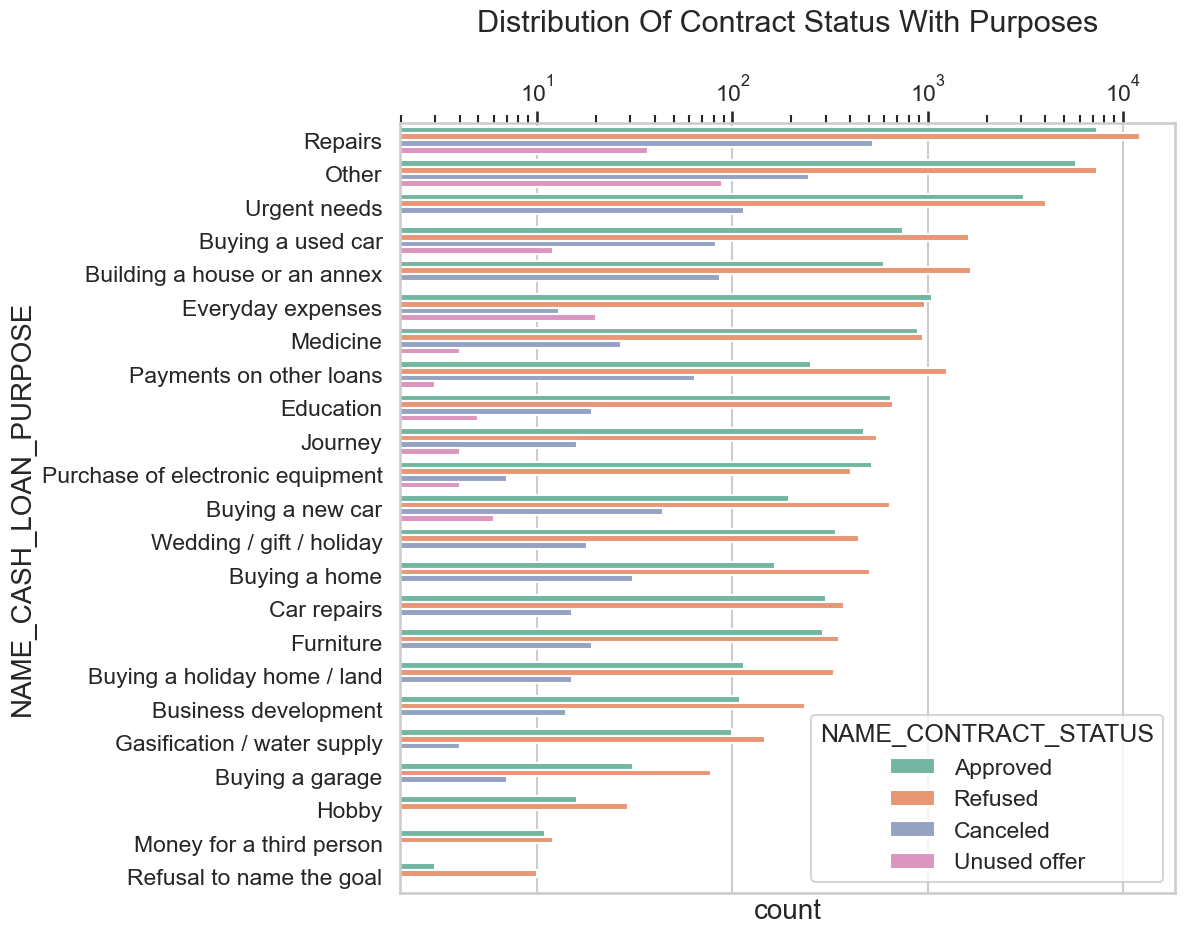

In [151]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Distribution Of Contract Status With Purposes')
plt.xscale('log')

ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='Set2') 
ax.xaxis.tick_top()

**Inference:**
<br>We can conclude the below points from the graph:<br>1.Most rejection of loans came from purpose 'Repairs'.<br>2.We have almost equal number of approves and rejection for Medicine,Every day expenses and education purposes.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

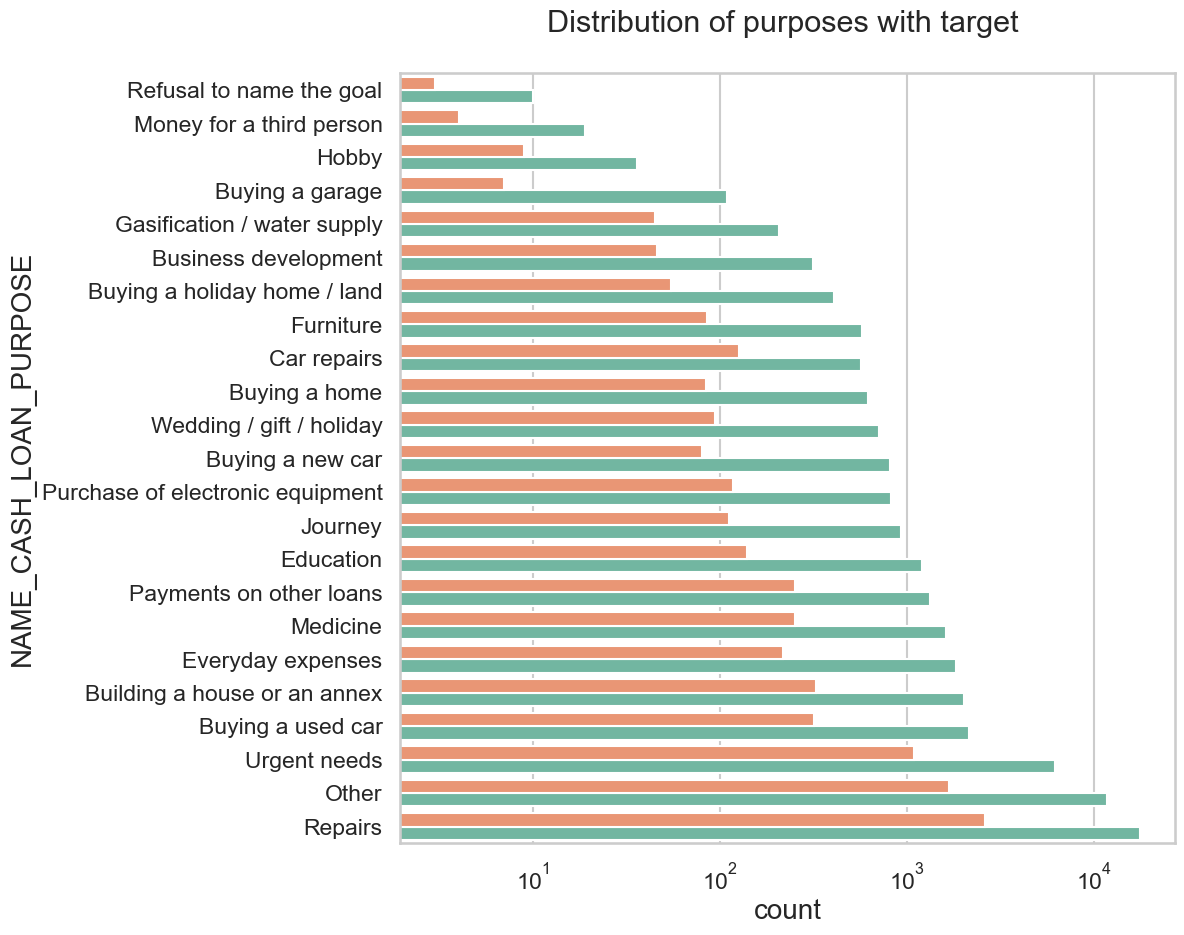

In [152]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'TARGET',palette='Set2') 
ax.xaxis.tick_top()

**Inference:**
we can conclude from above plot that Loan purposes with 'Repairs' are facing more difficulites in payment on time.